## Question 2:

In this question they ask to create a list of wines from different part of the world and identify areas similar for production to select best wine from such areas.

The question is not completely clear, there is no clear indication what do they mean by area and production in the question 

### Assumption:
 - I am gussing area means `country` or `province` in this context 
 - I am gussing production means `variety` in this context 

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS

For this question we are going to used the processed data which I created for question 1. 

In [2]:
df=pd.read_csv('dataprocessed.csv')
print(df.shape)

(120915, 10)


To better understand `price` and `points` for each country I am going to plot the mean `price` and `point` for each country. So I have grouped the dataframe by `country` and calculated mean

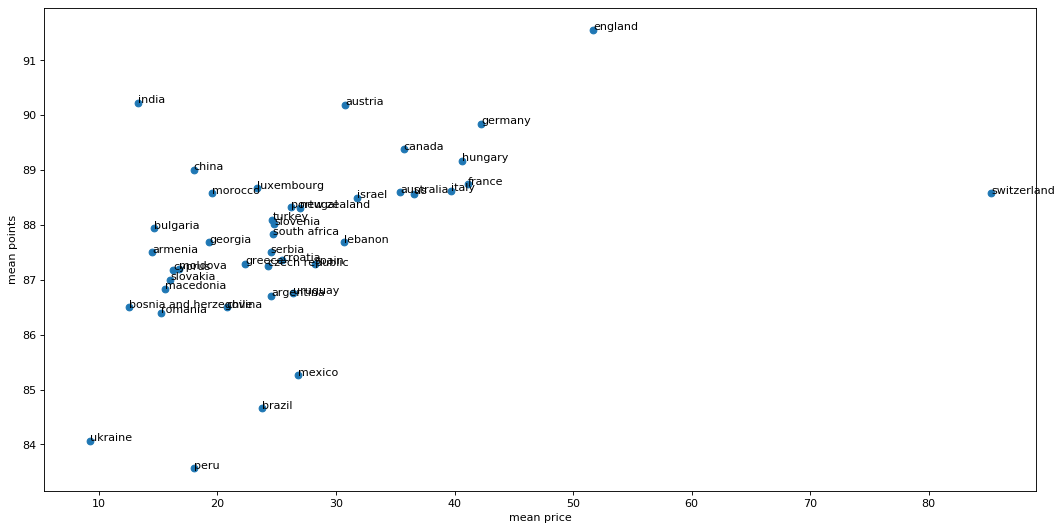

In [4]:
df_countries=df[['country','price','points']]
grb_countries=df_countries.groupby('country')['price','points'].mean().reset_index()

plt.figure(figsize=(16,8), dpi=80)
plt.scatter(grb_countries['price'], grb_countries['points'])
plt.xlabel('mean price')
plt.ylabel('mean points')
for i, txt in enumerate(grb_countries['country']):
    plt.annotate(txt, (grb_countries['price'][i], grb_countries['points'][i]))

From the plot you can see that switzerland has very high price compared to same quality wines in other countries. This gives a better idea about the price and points of wines coming from each country 

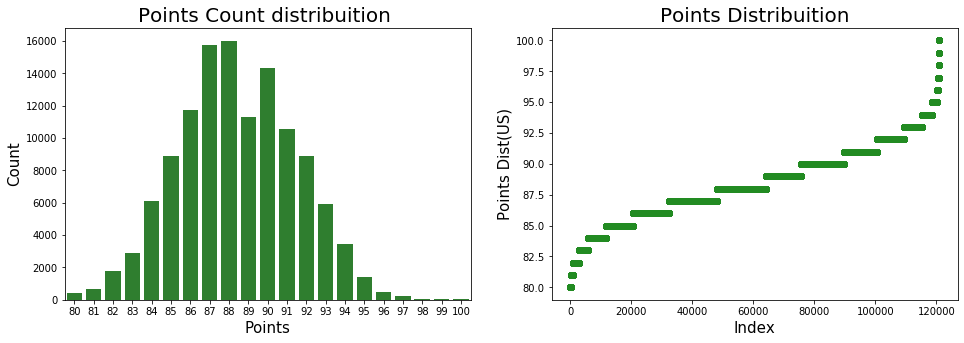

In [48]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() 

In [49]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df["rating_cat"] = df["points"].apply(cat_points)

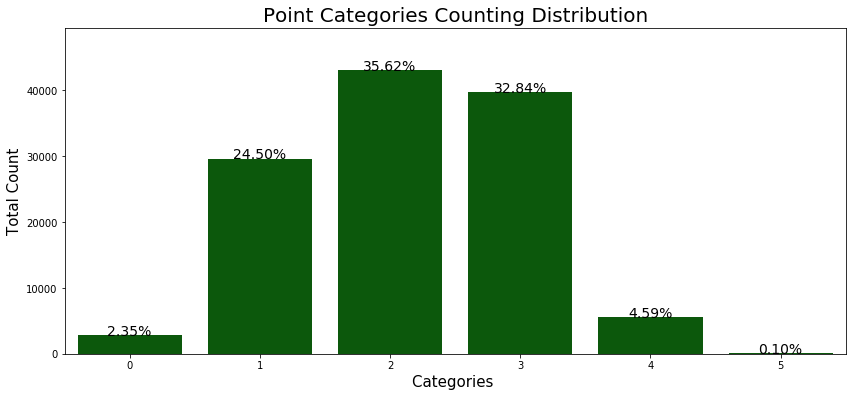

In [52]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

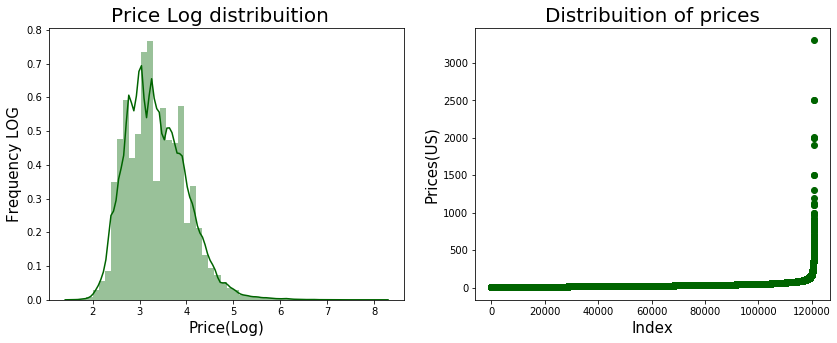

In [53]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

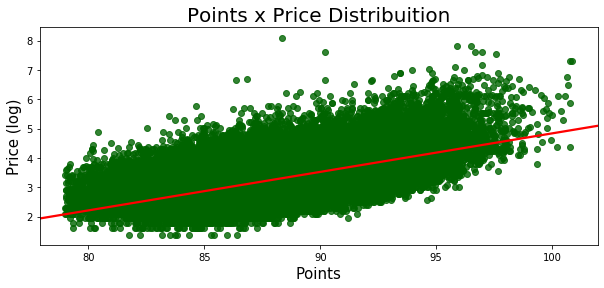

In [55]:
df['price_log'] = np.log(df['price'])
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

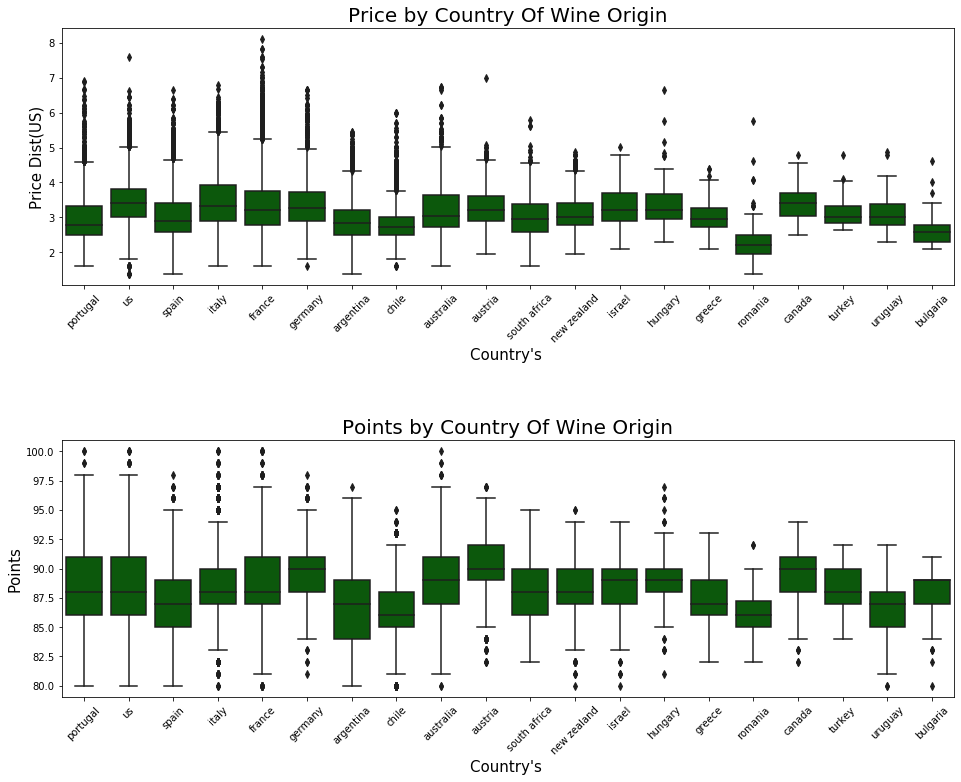

In [60]:
country = df.country.value_counts()[:20]
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

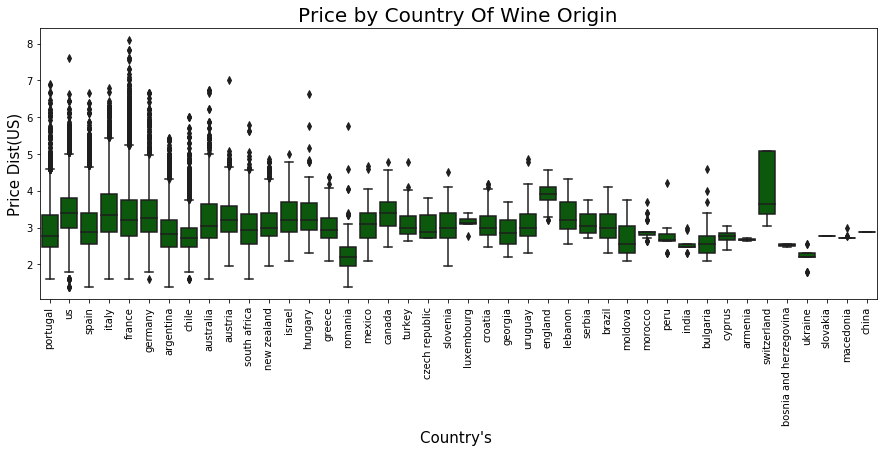

In [61]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',
                  data=df)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

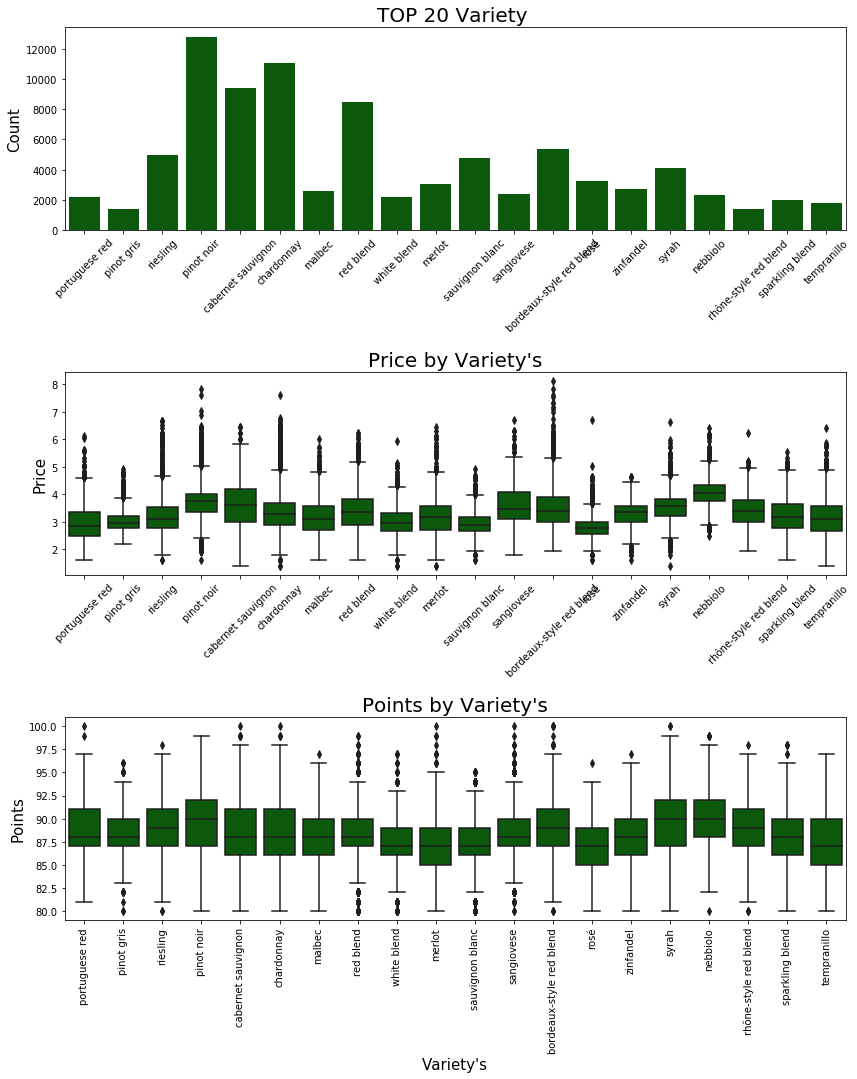

In [64]:
plt.figure(figsize=(14,16))

variety = df.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

In [9]:
grb_country=df.groupby('country')

I have grouped the data by country. That created 42 groups. So I will group each country data by province then each province by variety then finally choosed the best wine from each variety by points.

In [37]:
d=pd.DataFrame()
for name,group in grb_country:
    print(name,len(group.province.unique()))
    grb_province=group.groupby('province')
    for n,gb in grb_province:
        print(n)
        g=gb.groupby('variety')
        for nn,gv in g:
            print(nn)
            l=gv.sort_values('points')
            print(l.values[0])
            d=d.append(l.iloc[0])
                

argentina 2
mendoza province
bonarda
['hollen family vineyards 2008 bonarda (mendoza)' 'bonarda' 'unknown'
 'argentina' 'mendoza province'
 "murky and dark in appearance, this older bonarda smells soupy and too much like clove. tannic and pounding, this is a stewy wine with an abundance of oak-driven clove flavor. there's sticky residue on the finish."
 14.0 'hollen family vineyards' 'michael schachner' 80]
bordeaux-style red blend
['casarena 2010 reserva sinergy red (mendoza)' 'bordeaux-style red blend'
 'reserva sinergy' 'argentina' 'mendoza province'
 "the quality of casarena's wines range from excellent to not great, with all points in between represented. this malbec-led blend is heavy and raisiny on the nose, then syrupy in the mouth, with flavors running straight to candied and flat."
 25.0 'casarena' 'michael schachner' 81]
bordeaux-style white blend
['weinert 2009 carrascal white (mendoza)' 'bordeaux-style white blend'
 'carrascal' 'argentina' 'mendoza province'
 "bland and ch

malbec blend
['luigi bosca 2013 finca los nobles malbec verdot field blend malbec blend (luján de cuyo)'
 'malbec blend' 'finca los nobles malbec verdot field blend' 'argentina'
 'mendoza province'
 'dense woody aromas come with notes of damp earth, coffee grounds and eucalyptus nut. on the palate, this blend of malbec and 7% petit verdot is high in acidity but also resiny from oak treatment. salty plum and tomato flavors give way to a tidal wave of oak flavor on the finish. drink through 2025.'
 95.0 'luigi bosca' 'michael schachner' 89]
malbec-bonarda
['zamarro 2009 malbec-bonarda (mendoza)' 'malbec-bonarda' 'unknown'
 'argentina' 'mendoza province'
 "for a $5 wine, it offers pretty good red berry aromas along with a decent mouthfeel and proper acidity. the palate pops with red plum and raspberry flavors along with mild stalky, brambly notes that are more in the background than up front. not overwhelming but doesn't disappoint."
 5.0 'zamarro' 'michael schachner' 84]
malbec-cabernet


riesling
['luigi bosca 2014 las compuertas riesling (luján de cuyo)' 'riesling'
 'las compuertas' 'argentina' 'mendoza province'
 "a full, oily nose with aromas of orange blossom and lychee turns more fleshy and mealy with airing. this has a plump, flush body and flavors of lime, orange and white table grapes. a citrusy finish is fruity but doesn't glide."
 15.0 'luigi bosca' 'michael schachner' 86]
rosado
['françois lurton 2015 piedra negra pinot gris alta colección rosado (uco valley)'
 'rosado' 'piedra negra pinot gris alta colección' 'argentina'
 'mendoza province'
 'salmon-colored and spritzy, this rosé of pinot grigio smells stony and peachy. a zesty palate has sizzle and zest to it, while stone-fruit and minerally flavors are salty prior to a mildly bitter finish that tastes of pithy citrus.'
 12.0 'françois lurton' 'michael schachner' 85]
rosé
['piattelli 2010 premium rosé of malbec rosé (luján de cuyo)' 'rosé'
 'premium rosé of malbec' 'argentina' 'mendoza province'
 'cloudy t

 17.0 'manos negras' 'michael schachner' 81]
red blend
['verum 2012 los cisnes coalescence red (alto valle del río negro)'
 'red blend' 'los cisnes coalescence' 'argentina' 'other'
 'leathery, rubbery aromas are pinched, stalky and unripe. this patagonian blend is drawing and astringent, with bland, cool-climate red-berry flavors that have an herbal streak. saucy, tannic and heavy on the finish, this ends with a note of salami and fennel.'
 25.0 'verum' 'michael schachner' 83]
rosé
['michel torino 2014 rosé (calchaquí valley)' 'rosé' 'unknown' 'argentina'
 'other'
 'this smells distinctly of rubber and little else. unbalanced and flat in feel, with fleshy citrus and cranberry flavors, this gives off a skins-like sensation as it finishes.'
 12.0 'michel torino' 'michael schachner' 80]
sauvignon blanc
['bodega tacuil 2014 rd sauvignon blanc (salta)' 'sauvignon blanc' 'rd'
 'argentina' 'other'
 'musky orange and grapefruit aromas include asparagus and bell pepper scents. this is flat in f

shiraz-viognier
['hungerford hill 2005 fishcage shiraz-viognier (south eastern australia)'
 'shiraz-viognier' 'fishcage' 'australia' 'australia other'
 'a creamy-textured, medium-bodied wine, this entry-level offering from hungerford hill offers scents of coffee and mixed spices alongside earthier notes. blackberry and pepper flavors fade slowly on the finish, revealing slightly dusty tannins—just enough to cut through the fat of a juicy hamburger.'
 13.0 'hungerford hill' 'joe czerwinski' 87]
sparkling blend
['yellow tail nv bubbles sparkling white wine sparkling (south eastern australia)'
 'sparkling blend' 'bubbles sparkling white wine' 'australia'
 'australia other'
 "yellow tail's sparkler is an aromatic blend of semillon, traminer, viognier and trebbiano that manages to be largely neutral on the palate at the same time it's perfumed on the nose. frothy and off dry."
 10.0 'yellow tail' 'joe czerwinski' 83]
viognier
['tall poppy 2006 reserve viognier (south eastern australia)' 'vi

 18.0 'cascabel' 'joe czerwinski' 92]
petit verdot
['gemtree 2008 the phantom petit verdot (mclaren vale)' 'petit verdot'
 'the phantom' 'australia' 'south australia'
 "petit verdot is a character actor who's never really grabbed the spotlight for itself, but makes an interesting appearance now and again. this mclaren vale example is oaky but backed by ample plum and cassis fruit and framed by tannins that seem soft for the variety. cedar and spice come through on the finish. drink now."
 20.0 'gemtree' 'joe czerwinski' 88]
petite sirah
['oliverhill 2006 petite sirah (mclaren vale)' 'petite sirah' 'unknown'
 'australia' 'south australia'
 'a well-made petite sirah with jammy fruit and some tannic structure, this wine could develop nicely over the next 5–6 years. right now, the fruit is somewhat simple, but the acids and tannins seem to have the balance to age, and the fruit is concentrated enough to go at least that far.'
 25.0 'oliverhill' 'joe czerwinski' 86]
pinot grigio
['vinaceous

shiraz-roussanne
["d'arenberg 2009 the wild pixie shiraz-roussanne (mclaren vale)"
 'shiraz-roussanne' 'the wild pixie' 'australia' 'south australia'
 'this is surprisingly tough and tannic for a wine that incorporates 8% of a white variety. but those mouth-drying tannins give shape to the cassis, cranberry and black olive notes. take a chance by cellaring this rather austere wine for five years or so and see how it develops.'
 29.0 "d'arenberg" 'joe czerwinski' 90]
shiraz-viognier
["angove's 2006 nine vines shiraz-viognier (south australia)"
 'shiraz-viognier' 'nine vines' 'australia' 'south australia'
 'this wine shows strong barnyard and sulfur notes overwhelming an otherwise appealing nose of herbes de provence and grilled pork. the palate is juicy, with appealing cherry notes while the smooth finish winds up on an ashy note.'
 12.0 "angove's" 'unknown' 82]
sparkling blend
['mollydooker nv miss molly sparkling (mclaren vale)' 'sparkling blend'
 'miss molly' 'australia' 'south austr

cabernet sauvignon
['tahbilk 2007 cabernet sauvignon (nagambie lakes)' 'cabernet sauvignon'
 'unknown' 'australia' 'victoria'
 'this wine is a bit austere and tough to warm up to, with dry, leafy overtones encircling tangy cassis fruit like a cigar wrapper. firm and crisp on the finish; try it in another year or two—it might improve with short-term cellaring.'
 19.0 'tahbilk' 'joe czerwinski' 85]
cabernet sauvignon-merlot
['little rebel 2004 cabernet sauvignon-merlot (yarra valley)'
 'cabernet sauvignon-merlot' 'unknown' 'australia' 'victoria'
 'this is a classically proportioned bordeaux blend, featuring 70% cabernet sauvignon and 30% merlot. mint and cassis aromas pick up shadings of dried herbs and tobacco on the palate, ending with good persistence and a certain degree of elegance. because of that, serve this wine alongside a roast rather than a big, beefy steak.'
 15.0 'little rebel' 'joe czerwinski' 87]
cabernet sauvignon-sangiovese
['de bortoli 2008 melba lucia cabernet sauvigno

roussanne
['giaconda 2005 aeolia roussanne (victoria)' 'roussanne' 'aeolia'
 'australia' 'victoria'
 "a full-bodied, mouthfilling wine, giaconda's 2005 aeolia roussanne showcases aromas of toasted cashews, then balances them against bold peach and citrus fruit. the oak lends a slightly charred quality to the wine, which comes through on the finish as a hint of espresso. drink now and over the next few years."
 100.0 'giaconda' 'joe czerwinski' 90]
sangiovese
['fairbank sutton grange 2015 sangiovese (bendigo)' 'sangiovese' 'unknown'
 'australia' 'victoria'
 "made from organically farmed vineyards, with native yeast and old barrels, this wine is a melting pot of bright cranberry and raspberry, smoke, toast, florals and sweet herbs. medium bodied, with silky tannins, and plenty of terroir expression, it's well priced to boot. a win all around."
 22.0 'fairbank sutton grange' 'unknown' 90]
sauvignon
['de bortoli 2007 estate grown sauvignon (yarra valley)' 'sauvignon'
 'estate grown' 'austr

pinot noir
['salitage 2005 treehouse pinot noir (pemberton)' 'pinot noir' 'treehouse'
 'australia' 'western australia'
 "a lightweight, supple pinot with decent varietal definition, salitage's treehouse pinot features slightly herbal notes of brown sugar and cherries, then fades quickly on the finish. drink now."
 20.0 'salitage' 'joe czerwinski' 84]
red blend
['ironberry 2005 cabernet shiraz merlot red (western australia)'
 'red blend' 'cabernet shiraz merlot' 'australia' 'western australia'
 "comes out of the chute showing a funky, rubbery edge, but that blows off with a little time to reveal dark, somewhat earthy notes of cola and blackberry. it's medium-bodied, with good length to the finish, where it picks up enough dusty tannins to give it backbone."
 9.0 'ironberry' 'joe czerwinski' 87]
riesling
['bush bike 2005 riesling (western australia)' 'riesling' 'unknown'
 'australia' 'western australia'
 'chiseled and spunky, this slightly older riesling shows complex slate, lime zest an

muskat ottonel
['hafner 2007 kosher muskat ottonel (burgenland)' 'muskat ottonel'
 'kosher' 'austria' 'burgenland'
 'characteristic spiciness and grape flavors show well in this dry wine. there is an apple leanness about the texture, but the acidity gives it freshness, and a crisp aftertaste.'
 7.0 'hafner' 'roger voss' 84]
neuburger
['tinhof 2016 neuburger (burgenland)' 'neuburger' 'unknown' 'austria'
 'burgenland'
 "this wine's nose gives little more than a suggestion of zesty ripeness. the palate, on the other hand, is full of friendly, lively fruit. crisp green and yellow apple and ripe citrus pervade its slender but joyful frame. zesty and fresh, it only faintly hints of the variety's usual nuttiness."
 21.0 'tinhof' 'anne krebiehl\xa0mw' 89]
pinot blanc
['höpler 2014 pinot blanc (burgenland)' 'pinot blanc' 'unknown' 'austria'
 'burgenland'
 'the smells of wet pebbles and very faint apple fruit characterize this slender, refreshing and easygoing pinot blanc. on the palate there is

zweigelt
['winzer krems 2005 sandgrube 13 chremisa zweigelt (kremstal)' 'zweigelt'
 'sandgrube 13 chremisa' 'austria' 'kremstal'
 "beyond the spice of this cool-climate wine,  the flavors offer red berry fruits, fresh acidity and stalky tannins. it's soft, easy to drink now."
 24.0 'winzer krems' 'roger voss' 85]
leithaberg
blaufränkisch
['esterházy 2011 blaufränkisch (leithaberg)' 'blaufränkisch' 'unknown'
 'austria' 'leithaberg'
 'a fine-boned, graceful structure currently takes the limelight, with extracted but ripe tannins. with time, blackberry fruit and some undergrowth flavors come to the forefront. there are layers of iron-oxide, white pepper and subtle cinnamon.'
 25.0 'esterházy' 'anne krebiehl\xa0mw' 87]
chardonnay
['mariell 2010 chardonnay (leithaberg)' 'chardonnay' 'unknown' 'austria'
 'leithaberg'
 'a lightweight chardonnay, with crisp acidity and citrus flavors. it is soft, full of white fruits, with a burst of orange zest. not for aging, ready to drink.'
 17.0 'mariell'

red blend
['arndorfer 2014 vorgeschmack red (niederösterreich)' 'red blend'
 'vorgeschmack' 'austria' 'niederösterreich'
 'full and heady notes of iron-oxide and pepper are bound up in the fragrant blueberry nose. the light to medium body is translucent with flavour and highlights the pepperiness and the fresh berry fruit. there is the slightest tannin texture and ample freshness. this would even work as a chilled summer red.'
 19.0 'arndorfer' 'anne krebiehl\xa0mw' 88]
riesling
['pratsch 2008 select riesling (niederösterreich)' 'riesling' 'select'
 'austria' 'niederösterreich'
 'a curiously textured wine, with dry stone fruit characters, missing some of the aromatic virtues of riesling. that said, it has good freshness, white currant acidity and a light, crisp finish. screwcap.'
 22.0 'pratsch' 'roger voss' 84]
rosé
['pratsch 2011 rosé (niederösterreich)' 'rosé' 'unknown' 'austria'
 'niederösterreich'
 'bright, light, fresh and fruity, this is a perfect apéritif. it has red berry frui

austrian white blend
['johanneshof reinisch 2013 gumpoldskirchner tradition white (thermenregion)'
 'austrian white blend' 'gumpoldskirchner tradition' 'austria'
 'thermenregion'
 'earthy notes of wild mushrooms, soy sauce and citrus peel make for an unusual nose on this blend of indigenous and rare austrian varieties rotgipfler and zierfandler. friendly, ripe and rounded yellow and red apples play on the palate of this unusual but very versatile wine.'
 20.0 'johanneshof reinisch' 'anne krebiehl\xa0mw' 87]
blaufränkisch
['stift klosterneuburg 2014 tattendorf blaufränkisch (thermenregion)'
 'blaufränkisch' 'tattendorf' 'austria' 'thermenregion'
 "a subdued nose leads to a lively, fresh palate with both red and black fruit: there's crunchy red cherry and some blueberry. the palate is light and easy to drink, and majors on its primary fruit notes and ample freshness."
 22.0 'stift klosterneuburg' 'anne krebiehl\xa0mw' 88]
pinot noir
['johanneshof reinisch 2011 pinot noir (thermenregion)'

red blend
['anton bauer 2012 reserve red (wagram)' 'red blend' 'reserve' 'austria'
 'wagram'
 'broodingly black cherry with aromatic sprays of pepper accompany notions of dark flower petals with a tarry edge. on the palate a meatiness adds a further layer of flavor. there is alcoholic strength and lots of concentration but this is a young wine which still has to come into its own. enjoy its ripe elegance as of 2016.'
 30.0 'anton bauer' 'anne krebiehl\xa0mw' 92]
riesling
['weingut groiss 2014 riesling (wagram)' 'riesling' 'unknown' 'austria'
 'wagram'
 'a taut, clean riesling that seems a little subdued in its flavors. the palate is clean and fresh and offers the refreshment one expects from dry, austrian riesling.'
 16.0 'weingut groiss' 'anne krebiehl\xa0mw' 87]
rosé
['fritsch 2014 rosé vom rosé (wagram)' 'rosé' 'rosé vom' 'austria'
 'wagram'
 'citrus and soft red berry flavors are restrained on nose and palate of this pale, pink and slender rosé. but the bone-dry nature of the wine 

weinviertel
chardonnay
['ebner-ebenauer 2013 black edition chardonnay (weinviertel)' 'chardonnay'
 'black edition' 'austria' 'weinviertel'
 'very slight notions of honeycomb hover over the nose before giving over to restrained, hazelnutty oak flavors. this is fruity but sprightly, rounded and precise, fresh but medium-bodied. right now, it is still full of primary fruit flavors—think red apple and citrus—but this will mature beautifully and become ever more mellow, but with pleasing freshness. the long aftertaste is very promising.'
 60.0 'ebner-ebenauer' 'anne krebiehl\xa0mw' 92]
grüner veltliner
['pratsch 2011 grüner veltliner (weinviertel)' 'grüner veltliner'
 'unknown' 'austria' 'weinviertel'
 'classic grüner veltliner, this combines a creamy texture with crisp green fruit. bright, fruity and ready to drink.'
 19.0 'pratsch' 'roger voss' 85]
riesling
['kirchmayr 1988 solist altenberg riesling (weinviertel)' 'riesling'
 'solist altenberg' 'austria' 'weinviertel'
 'almost sweet in it

welschriesling
['szigeti nv brut welschriesling (österreichischer sekt)' 'welschriesling'
 'brut' 'austria' 'österreichischer sekt'
 'clean, fruity and spicy, this has flavors of green apple and white plum. the wine is crisp and perfumed, with a great line of acidity on the finish.'
 25.0 'szigeti' 'roger voss' 86]
bosnia and herzegovina 1
mostar
blatina
['winery čitluk 2011 blatina (mostar)' 'blatina' 'unknown'
 'bosnia and herzegovina' 'mostar'
 'a mix of red and black fruits pervade on the nose, with hints of roasted coffee beans bringing nuance. flavors of black plum and freshly ground espresso dominate the palate.'
 12.0 'winery čitluk' 'jeff jenssen' 88]
vranec
['winery čitluk 2007 vranac vranec (mostar)' 'vranec' 'vranac'
 'bosnia and herzegovina' 'mostar'
 "toasted oak and cedar notes meld into lush, ripe black plums on the nose and palate of this fruit-forward, richly concentrated wine from bosnia and herzegovina. it's a straightforward, accessible wine, but well balanced with

['targovishte 2009 riesling (bulgaria)' 'riesling' 'unknown' 'bulgaria'
 'bulgaria'
 'aromatically, this bulgarian riesling is quite pretty with loads of freshly pressed apples, elderflowers and meyer lemon scents. light bodied and dry with a racy acidity, its palate is austere but has some muted floral and honeydew flavors.'
 9.0 'targovishte' 'anna lee c. iijima' 85]
rosé
['vini 2011 veni vidi vici pinot noir-syrah rosé (bulgaria)' 'rosé'
 'veni vidi vici pinot noir-syrah' 'bulgaria' 'bulgaria'
 "notes of ripe red berries are featured on the nose of this off-dry rosé, alongside hints of dusty mineral and tomato water. it's straightforward on the palate, with a cheery, slightly candied berry flavor, but it finishes clean with brisk acidity."
 9.0 'vini' 'anna lee c. iijima' 85]
sauvignon blanc
['targovishte 2009 sauvignon blanc (bulgaria)' 'sauvignon blanc' 'unknown'
 'bulgaria' 'bulgaria'
 "though pleasant aromatically with lots of freshly cut grass and gooseberry notes, this full-bo

malbec
['burrowing owl 2014 malbec (okanagan valley)' 'malbec' 'unknown' 'canada'
 'british columbia'
 'this delicious and distinctive take on the grape as a pure varietal impresses with its solid core of purple plum and blueberry fruit. aromatic accents of lemon and green tea continue into the palate as well, and the lengthy finish is fresh and multi-dimensional.'
 32.0 'burrowing owl' 'paul gregutt' 92]
meritage
['burrowing owl 2011 meritage (okanagan valley)' 'meritage' 'unknown'
 'canada' 'british columbia'
 'this wine plays out broadly across the palate, showing tart berries and espresso components, along with a whiff of asparagus. the fruit is somewhat thin and front-loaded, with barrel flavors of toast and cigar box masking some—not all—of the herbaceousness.'
 49.0 'burrowing owl' 'paul gregutt' 87]
merlot
['tinhorn creek 2012 oldfield series merlot (okanagan valley)' 'merlot'
 'oldfield series' 'canada' 'british columbia'
 "though it's designated as reserve-level, and lists ra

cabernet sauvignon
['pillitteri 2002 family reserve cabernet sauvignon (niagara peninsula)'
 'cabernet sauvignon' 'family reserve' 'canada' 'ontario'
 'this is an intriguing red, with its nose of dried fennel, eucalyptus, and rosemary, and on the palate, pretty flavors of cassis and anise. though gentle, the wine has balance and character. imported by wine emporium.'
 50.0 'pillitteri' 'susan kostrzewa' 85]
chardonnay
['rosehall run 2008 rosehall vineyard chardonnay (prince edward county)'
 'chardonnay' 'rosehall vineyard' 'canada' 'ontario'
 "fresh apple and white floral notes meld effortlessly into an elegant vanilla note on the nose and palate of this dry, full-bodied chard. nicely concentrated, yet brisk with acidity, it's an excellent food pairing companion."
 30.0 'rosehall run' 'anna lee c. iijima' 86]
gewürztraminer
['konzelmann 2008 late harvest gewürztraminer (niagara peninsula)'
 'gewürztraminer' 'late harvest' 'canada' 'ontario'
 'smoky and dark with hints of petrol and pot

carmenère
['errazuriz 2012 max reserva carmenère (aconcagua valley)' 'carmenère'
 'max reserva' 'chile' 'aconcagua valley'
 'prickly, herbal berry aromas are gritty and then fall flat. this is big, grabby and clumsy on the palate, with flavors of roasted berry and green herbs. a soupy-tasting finish turns more green the longer it sits. from a hot vintage, this carmenère tastes baked and compromised.'
 20.0 'errazuriz' 'michael schachner' 84]
chardonnay
['santa rita 2006 120 chardonnay (aconcagua valley)' 'chardonnay' '120'
 'chile' 'aconcagua valley'
 "gritty and corny on the nose, and frankly it's almost acrid.  bitter; the only fruit that comes up is banana."
 9.0 'santa rita' 'michael schachner' 80]
malbec
['conde de velázquez 2013 el conde gran reserva malbec (aconcagua valley)'
 'malbec' 'el conde gran reserva' 'chile' 'aconcagua valley'
 'earthy and stewy plum and berry aromas lead to heavy, clunky palate with leafy mulchy berry flavors. end notes of carob are mostly oak-based, w

['viña la rosa 2011 la palma sauvignon blanc (cachapoal valley)'
 'sauvignon blanc' 'la palma' 'chile' 'cachapoal valley'
 "basic citrus and apple aromas lead to a round palate that won't stay fresh for much longer. it tastes melony and green, with lettuce flavors and a flat finish."
 9.0 'viña la rosa' 'michael schachner' 82]
shiraz
['viña la rosa 2008 la capitana barrel reserve shiraz (cachapoal valley)'
 'shiraz' 'la capitana barrel reserve' 'chile' 'cachapoal valley'
 "starts out with proprietary aromas of clove, spice and cinnamon, and in the mouth it's a tannic grabber with forcefulness as well as ripe, sweet, menthol-infused berry flavors. falls off somewhat on the finish, where butter and candy come in. heavy and dark but still good for a new world syrah."
 17.0 'viña la rosa' 'michael schachner' 87]
syrah
['château los boldos 2012 momentos reserva syrah (cachapoal valley)'
 'syrah' 'momentos reserva' 'chile' 'cachapoal valley'
 'this smells pretty good: cherry and plum aromas 

sparkling blend
['morandé nv brut nature sparkling (casablanca valley)' 'sparkling blend'
 'brut nature' 'chile' 'casablanca valley'
 'funky on the nose, then tangy and briny in the mouth, with lemon, green notes and pickled flavors that lose clarity and fruit content with airing. this tastes green, ashy and stretched on the finish. not a good value at $45.'
 45.0 'morandé' 'michael schachner' 83]
syrah
['lomas del valle 2010 coastal cool climate syrah (casablanca valley)'
 'syrah' 'coastal cool climate' 'chile' 'casablanca valley'
 'this wine is rubbery and gaseous on the bouquet, with compost, creamy oak and milk chocolate scents. the feel is full but jumbled with jammy black fruit flavors.'
 14.0 'lomas del valle' 'michael schachner' 83]
viognier
['mancura 2013 reserva guardián viognier (casablanca valley)' 'viognier'
 'reserva guardián' 'chile' 'casablanca valley'
 'aromas of waxy stone fruits and gasoline announce a wine with issues. this viognier feels citric and racy, with littl

rosé
['lapostolle 2016 le rosé rosé (chile)' 'rosé' 'le rosé' 'chile' 'chile'
 'this spunky rosé relies mostly on itata cinsault, but also colchagua fruit. the nose is alert but simple, with tangerine and peach-pit aromas. this feels round yet lively, while briny stone-fruit and citrus flavors finish salty and a bit sulfuric.'
 21.0 'lapostolle' 'michael schachner' 85]
sauvignon blanc
['concha y toro 2016 casillero del diablo reserva sauvignon blanc (chile)'
 'sauvignon blanc' 'casillero del diablo reserva' 'chile' 'chile'
 'aromas of bland citrus, oyster shell and pool water are not stout or convincing. this basic sb feels flat, while flavors of bell pepper and salted pickle finish light, bland and green.'
 11.0 'concha y toro' 'michael schachner' 83]
sparkling blend
['valdivieso nv brut sparkling (chile)' 'sparkling blend' 'brut' 'chile'
 'chile'
 'this tan-colored brut is outright oxidized and bready from front to tail. a foamy full palate is awkward, while this tastes yeasty and st

cabernet sauvignon-merlot
['estampa 2006 cabernet sauvignon-merlot (colchagua valley)'
 'cabernet sauvignon-merlot' 'unknown' 'chile' 'colchagua valley'
 "smooth and fruity on the nose, with ample lushness and fairly ripe berry and cassis flavors. this is basically a cabernet sauvignon (with 20% merlot), and it offers comfortable, medium-intensity flavors of raspberry, strawberry and currants. it's what you can drink with pizza or a grilled skirt steak."
 9.0 'estampa' 'michael schachner' 86]
cabernet sauvignon-syrah
['montgras 2013 reserva cabernet sauvignon-syrah (colchagua valley)'
 'cabernet sauvignon-syrah' 'reserva' 'chile' 'colchagua valley'
 'aromas of underbrush and leather dominate a rustic nose. the palate tastes briny, with underripe berry flavors that finish candied and herbaceous.'
 12.0 'montgras' 'michael schachner' 83]
carmenère
['françois lurton 2008 hacienda araucano carmenère (colchagua valley)'
 'carmenère' 'hacienda araucano' 'chile' 'colchagua valley'
 'strange a

syrah-cabernet sauvignon
['ninquén 2009 ninquén mountain vineyard syrah-cabernet sauvignon (colchagua valley)'
 'syrah-cabernet sauvignon' 'ninquén mountain vineyard' 'chile'
 'colchagua valley'
 "this syrah-cab blend is an oaky specimen with no shortage of vanilla, cream and sawdust on the nose. in the mouth, it's quite rich, almost to the point of being syrupy. flavors of blackberry, toast, vanilla and popcorn announce even more generous oak, while the finish is warm in feel, with baked fruit, mint and vanilla flavors. drink now–2017."
 48.0 'ninquén' 'michael schachner' 90]
sémillon
['viu manent 2008 botrytis selection noble sémillon (colchagua valley)'
 'sémillon' 'botrytis selection noble' 'chile' 'colchagua valley'
 'peachy and a little sharp on the nose, but the palate is smooth and glides along nicely, and the flavors of citrus, honey and caramel are good and hold form through the finish. you can definitely taste the botrytis here, especially on the finish. fresh and not at all

gewürztraminer-riesling
['miguel torres 2000 don miguel gewürztraminer-riesling (curicó valley)'
 'gewürztraminer-riesling' 'don miguel' 'chile' 'curicó valley'
 'a 75-25 blend that showcases the exotic lychee and pear aromas of gewürz, while the riesling asserts itself on the finish in a rush of bracing lime-like acidity. a unique blend that offers plenty of food-pairing versatility.'
 11.0 'miguel torres' 'joe czerwinski' 88]
malbec
['viña requingua 2014 los riscos malbec (curicó valley)' 'malbec'
 'los riscos' 'chile' 'curicó valley'
 'aromas of mushroom, dirty water and mud puddle are far from inviting. herbal, briny flavors of mushroom, salt and bitterness come with almost no fruit.'
 7.0 'viña requingua' 'michael schachner' 81]
merlot
['viña requingua 2011 puerto viejo reserve merlot (curicó valley)'
 'merlot' 'puerto viejo reserve' 'chile' 'curicó valley'
 'earthy, leathery aromas are hot and end up smelling like a field in summertime. it feels hard on the palate, with a buttery

red blend
['elqui wines 2013 red (elqui valley)' 'red blend' 'unknown' 'chile'
 'elqui valley'
 "this blend of syrah, carmenère and malbec is better than ew's varietal wines made from those same grapes, which proves that sometimes blends are best. it offers plum, currant and floral aromas before a fairly rich palate. chocolaty blackberry and burnt notes end with a chocolate-driven finish."
 16.0 'elqui wines' 'michael schachner' 89]
sauvignon blanc
['falernia 2014 reserva sauvignon blanc (elqui valley)' 'sauvignon blanc'
 'reserva' 'chile' 'elqui valley'
 'yeasty, bland, unconvincing aromas make for an unremarkable opening. this is flabby and broken on the palate, with yeasty flavors of canned peas.'
 10.0 'falernia' 'michael schachner' 81]
syrah
['piggy bank 2010 syrah (elqui valley)' 'syrah' 'unknown' 'chile'
 'elqui valley'
 "rubbery, plastic-like aromas of black fruits come with a burnt, smoky edge. there's grip and acidity on the palate, but the mouthfeel is jumbled, and the wine'

lolol valley
cabernet sauvignon
['chilcas 2011 reserva estate bottled cabernet sauvignon (lolol valley)'
 'cabernet sauvignon' 'reserva estate bottled' 'chile' 'lolol valley'
 'dusty raspberry and plum aromas are spicy, dry and attractive, leading to a fresh palate with kick. flavors of spiced plum, raspberry and red cherry are a touch briny, while the finish has length and a pleasing texture.'
 12.0 'chilcas' 'michael schachner' 88]
carmenère
['françois lurton 2007 hacienda araucano alka carmenère (lolol valley)'
 'carmenère' 'hacienda araucano alka' 'chile' 'lolol valley'
 "lavender, thyme, rosemary and other green herb notes dot the nose, which leads to a solid, cushioned palate with sweet berry, leaf, spice and carob flavors. finishes sweet, with melted chocolate and heft. just short of excellent but still the best carmenère yet from françois lurton's colchagua property."
 60.0 'françois lurton' 'michael schachner' 89]
pinot noir
['françois lurton 2015 araucano humo blanco edicion 

merlot
['san pedro 2002 gato negro merlot (lontué valley)' 'merlot' 'gato negro'
 'chile' 'lontué valley'
 'big, awkward aromas of red fruit and oak are followed by simple berry and plum flavors and even more overt oak. the finish is big and warm, while late in the game the wine turns tangy. this is one of many mass-market merlots with few glaring faults; but still it fights to rise above basic acceptability.'
 5.0 'san pedro' 'michael schachner' 82]
red blend
['alta cima 2013 special edition ensamblaje gran reserva red (lontué valley)'
 'red blend' 'special edition ensamblaje gran reserva' 'chile'
 'lontué valley'
 'earthy, lightly grilled plum and berry aromas are a bit damp. like a gate slamming shut, this is abrupt on a clipped palate. choppy red-plum, tomato and herbal flavors lead to a gravelly and crisp finish, with astringent tannins.'
 16.0 'alta cima' 'michael schachner' 88]
syrah
['korta 2007 barrel selection reserve syrah (lontué valley)' 'syrah'
 'barrel selection reserve'

pinot noir
['undurraga 2000 pinot noir (maipo valley)' 'pinot noir' 'unknown' 'chile'
 'maipo valley'
 "a light and tart wine, with a bouquet of berry, tea and a touch of barnyard. on the palate, there's more cherry, tea and oak. the fundamental pinot characteristics are here, but it turns drying and a bit sour on the finish."
 7.0 'undurraga' 'michael schachner' 82]
red blend
['la playa 1998 claret red (maipo valley)' 'red blend' 'claret' 'chile'
 'maipo valley'
 "this wine, like so many from the 1998 vintage in chile, is very light in texture and displays little depth. the flavors are accurate for a claret—mild berry and a touch of earth—and there's even a decent finish. a light quaff; don't expect weight."
 10.0 'la playa' 'unknown' 83]
riesling
['cousiño-macul 1999 doña isidora riesling (maipo valley)' 'riesling'
 'doña isidora' 'chile' 'maipo valley'
 "an attractive bouquet of pear, orange-lime and floral notes opens this easy, round white. there's a hint of mint and plenty of cit

['chilcas 2005 tierra oscura cabernet franc (maule valley)'
 'cabernet franc' 'tierra oscura' 'chile' 'maule valley'
 'a real south american take on this french grape. the nose is savory and smoky, with deep berry and vanilla aromas. so far so good, but the palate turns tannic and astringent, with black fruit and fig flavors getting run over by the grating mouthfeel. a take-no-prisoners wine with a coarse edge.'
 15.0 'chilcas' 'michael schachner' 84]
cabernet franc-carmenère
['tricky rabbit 2012 reserva cabernet franc-carmenère (maule valley)'
 'cabernet franc-carmenère' 'reserva' 'chile' 'maule valley'
 'chunky, slightly jammy plum and blackberry aromas are good but basic. in the mouth, this shows tartaric grit and bite along with lean fruit. flavors of red plum and raspberry finish zesty but with hardly any complexity.'
 12.0 'tricky rabbit' 'michael schachner' 86]
cabernet sauvignon
['balduzzi 1999 reserva cabernet sauvignon (maule valley)'
 'cabernet sauvignon' 'reserva' 'chile' '

rhône-style white blend
['undurraga 2016 sibaris gran reserva viognier-roussane-marsanne white (maule valley)'
 'rhône-style white blend'
 'sibaris gran reserva viognier-roussane-marsanne' 'chile' 'maule valley'
 "this blend of viognier, roussane and marsanne isn't typically chilean but it doesn't smell or taste all that french, either. tropical floral aromas are similar to bath oil, while this feels full, pulpy and oily. peach and persimmon flavors finish distinctly salty, with an oily feel and flavor notes of citrus peel."
 15.0 'undurraga' 'michael schachner' 87]
riesling
['meli 2008 riesling (maule valley)' 'riesling' 'unknown' 'chile'
 'maule valley'
 "from the beginning this '08 seems as though it has turned; the nose is mildly oxidized and corny, and there's a shortage of freshness. the palate is dull and narrow, with limited apple and sour lime flavors. acceptable but not at its peak anymore."
 12.0 'meli' 'michael schachner' 82]
rosé
['oveja negra 2011 reserva cabernet sauvign

merlot
['concha y toro 2001 marques de casa concha merlot (peumo)' 'merlot'
 'marques de casa concha' 'chile' 'peumo'
 'concha y toro is making a big, burly merlot for this line and it should have mass appeal given how rich, extracted and oaky it is. the nose is dense as chocolate cake and deep as a well. the mouth is chewy and thick, with chocolate-covered berries and another whack of wood.'
 14.0 'concha y toro' 'michael schachner' 87]
red blend
['santa ema 2009 amplus one red (peumo)' 'red blend' 'amplus one' 'chile'
 'peumo'
 'edgy aromas of plum, cherry and cassis are fresh but scratchy. in the mouth, this carmenère-led blend shows blazing, cutting acidity and racy flavors of cranberry and pie cherry. oak and vanilla show up on the finish, which is acidic and fresh, much like the rest of the wine.'
 22.0 'santa ema' 'michael schachner' 86]
pirque
cabernet sauvignon
['undurraga 2009 t.h. alto maipo cabernet sauvignon (pirque)'
 'cabernet sauvignon' 't.h. alto maipo' 'chile' 'pirque

syrah
['santa carolina 2008 reserva syrah (rapel valley)' 'syrah' 'reserva'
 'chile' 'rapel valley'
 'sweet aromas of berry pastry and black licorice are moderately convincing, while the palate is reduced and chunky, with thick but dull prune and roasted berry flavors. the finish is more of the same: baked fruit flavors and sweet.'
 10.0 'santa carolina' 'michael schachner' 84]
white blend
['santa monica 2004 late harvest white (rapel valley)' 'white blend'
 'late harvest' 'chile' 'rapel valley'
 "this attractive blend of 53% sémillon and 47% riesling offers a bouquet of petrol and apricot, while the palate is lively, with honeyed flavors of caramel, vanilla and apricot. it's a bit sticky on the finish, but overall this is an eye-opener. drink now–2015."
 17.0 'santa monica' 'michael schachner' 88]
requinoa
cabernet sauvignon-merlot
['château los boldos 1997 grand cru cabernet sauvignon-merlot (requinoa)'
 'cabernet sauvignon-merlot' 'grand cru' 'chile' 'requinoa'
 'the massenez family

san clemente
cabernet sauvignon
['viña casas patronales 2007 cabernet sauvignon (san clemente)'
 'cabernet sauvignon' 'unknown' 'chile' 'san clemente'
 "slightly heavy and saucy, with a bit of cooked fruit and lemony oak to the nose. but it's not over-the-top baked or overoaked, so there's still some black-fruit quality to mine as well as decent chocolate and mocha on the finish. hardly elegant, but by the same token it's not wanting for gusto."
 9.0 'viña casas patronales' 'michael schachner' 84]
cabernet sauvignon-syrah
['terranoble 2013 lahuen azul cabernet sauvignon-syrah (san clemente)'
 'cabernet sauvignon-syrah' 'lahuen azul' 'chile' 'san clemente'
 "big-time woody aromas are charred to the max, something that's normal for terranoble. a tannic palate is firm and staunch. woody blackberry flavors include a sweet dose of molasses, while coffee, spiced berry and lemony oak flavors are the conclusion on this blend of cabernet sauvignon, syrah and petit verdot."
 70.0 'terranoble' 'm

red blend
['iločki podrumi 2007 cabernet sauvignon blaufränkisch red (podunavlje)'
 'red blend' 'cabernet sauvignon blaufränkisch' 'croatia' 'podunavlje'
 "notes of sweet blueberry and blackberry jam entice on the nose and palate of this light to medium-bodied blend of cab and blaufränkisch. soft on the palate with a core of sweet black fruit, it's balanced by smooth tannins, bright acidity and just a hint of bramble and wood. surprisingly long on the finish."
 13.0 'iločki podrumi' 'anna lee c. iijima' 85]
traminer
['iločki podrumi 2008 traminer (podunavlje)' 'traminer' 'unknown'
 'croatia' 'podunavlje'
 'while softly smoky on the nose and palate, this honey-kissed traminer is gorgeously perfumed with notes of orange blossoms and waxy white florals. lusciously mouth quenching with a pithy, citrus-flavored mid-palate, it finishes on a tasty lime juice and white pepper note.'
 13.0 'iločki podrumi' 'anna lee c. iijima' 87]
welschriesling
['podrumi belje 2009 graševina welschriesling (po

pinot noir
['la cave des vignerons de pfaffenheim 2009 pinot noir (alsace)'
 'pinot noir' 'unknown' 'france' 'alsace'
 'earthy and rustic, this pinot noir is lightweight, with a hint of red cherry. there is an unpleasant bitter aftertaste.'
 20.0 'la cave des vignerons de pfaffenheim' 'roger voss' 80]
red blend
['domaine marcel deiss 2013 rouge red (alsace)' 'red blend' 'rouge'
 'france' 'alsace'
 "this is not an obvious wine, but one that creeps up slowly, takes time and impresses quietly. it delivers depth rather than power. glints of pepper and allspice shine amid the restrained red, tart cherry fruit. the slightest of tannic grips stems from concentration rather than extraction. it's elegant alsace pinot, quiet but firm."
 27.0 'domaine marcel deiss' 'anne krebiehl\xa0mw' 91]
riesling
['wunsch & mann 2011 riesling (alsace)' 'riesling' 'unknown' 'france'
 'alsace'
 'a bitter wine with tart apple and pear flavors, this has a hard edge. drink now.'
 20.0 'wunsch & mann' 'roger voss' 8

chardonnay-pinot gris
['simonnet-febvre 2014 saveurs de lyre ' 'chardonnay-pinot gris'
 'saveurs de lyre' 'france' 'burgundy'
 'this unusual blend, occasionally found in alsace, gives a wine that is full and perfumed. it offers almond and spice flavors along with a tight texture. the wine, with its warm acidity, is ready to drink.'
 17.0 'simonnet-febvre' 'roger voss' 85]
colombard-ugni blanc
['domaine de millet 2016  coteaux bourguignons' 'colombard-ugni blanc'
 'unknown' 'france' 'burgundy'
 "this typical, fruity wine from gascony offers lemon and herbal flavors and a crisply tangy texture. it's a light, breezy wine, full of fruit and tight with acidity. drink this refreshing wine now."
 10.0 'domaine de millet' 'roger voss' 85]
gamay
['louis tête 2013  bourgogne gamay' 'gamay' 'unknown' 'france' 'burgundy'
 'a wine that is fruity, with just a light texture from green herbs and cherry skins. good acidity cuts through the fruitiness and banana flavor at the end. drink now.'
 19.0 'lou

moscato
['le pépin 2015 moscato (vin de france)' 'moscato' 'unknown' 'france'
 'france other'
 'ripe peach and nectarine aromas and flavors are at the forefront of this friendly, approachable moscato, with touches of melon, pear and sweet orange to round it out. the palate is bright and balanced, with solid stone-fruit and pear flavors that finish fresh and easy.'
 6.0 'le pépin' 'lauren buzzeo' 85]
muscat
['yves leccia 2015 parcelle c281 muscat (ile de beauté)' 'muscat'
 'parcelle c281' 'france' 'france other'
 'this is an attractively perfumed dry muscat. very floral, deliciously decadent in its richness, it has a crisp bite of spice and pepper. drink the wine from 2017.'
 38.0 'yves leccia' 'roger voss' 88]
negrette
['lionel osmin & cie 2015 la vie en rose negrette (vin de france)'
 'negrette' 'la vie en rose' 'france' 'france other'
 'the négrette wines come mainly from a small area northwest of toulouse although they are also found in pockets elsewhere in the southwest. this is a 

grenache-carignan
['gérard bertrand 2009 grenache-carignan (fitou)' 'grenache-carignan'
 'unknown' 'france' 'languedoc-roussillon'
 'this comes off a bit tight and rustic, with astringent notes of black plum and cherry skin, tea leaf, black olive and licorice root. a cigar tobacco accent unfolds on the palate and marries harmoniously with the black-fruit core, while peppery spice lingers through the medium-length finish.'
 21.0 'gérard bertrand' 'lauren buzzeo' 88]
grenache-syrah
['penya 2013 grenache-syrah (côtes catalanes)' 'grenache-syrah' 'unknown'
 'france' 'languedoc-roussillon'
 "this grenache-based rosé, with 4% syrah, opens with a mélange of fruity aromas that carry through to the palate. notes of peach, guava, cherry, banana and melon are accented by a hint of garrigue. it's medium weight, with ample acidity to lift the ripe fruit flavors."
 12.0 'penya' 'lauren buzzeo' 87]
malbec
["fortant 2015 hills reserve malbec (pays d'oc)" 'malbec' 'hills reserve'
 'france' 'languedoc-r

shiraz
["yvon mau 2005 shiraz (vin de pays de l'aude)" 'shiraz' 'unknown'
 'france' 'languedoc-roussillon'
 'this impressive value from bordeaux house yvon mau shows that languedoc-roussillon is capable of turning out serious syrah/shiraz at a reasonable price. seared meat, black pepper and raspberry scents make for a nice opening while cherry and white pepper flavors permeate the moderately intense palate. short finish; drink up.'
 7.0 'yvon mau' 'unknown' 84]
sparkling blend
['delmas 2007 cuvée berlène brut sparkling (blanquette de limoux)'
 'sparkling blend' 'cuvée berlène brut' 'france' 'languedoc-roussillon'
 "there's a strong, nutty character to this bubbly, with accents of granny smith apple, toast and lemon rind citrus on the nose and mouth. the rich mouth is full and satisfying, but the alcohol is a bit warming on the close."
 12.0 'delmas' 'lauren buzzeo' 85]
syrah
["val d'orbieu 2001 reserve st. martin syrah (languedoc)" 'syrah'
 'reserve st. martin' 'france' 'languedoc-rous

cabernet sauvignon
['château routas 2011 wild boar cabernet sauvignon (vin de pays var)'
 'cabernet sauvignon' 'wild boar' 'france' 'provence'
 "black currant flavors dominates this wine. the palate is dense with flavor, with firm tannins allied with tense acidity and spicy licorice flavors. it's a ripe wine that shows potential for aging. drink from 2014. screwcap."
 14.0 'château routas' 'roger voss' 88]
cabernet-syrah
["château de beaupré 2010 cuvée du château cabernet-syrah (coteaux d'aix-en-provence)"
 'cabernet-syrah' 'cuvée du château' 'france' 'provence'
 'dry and firmly tannic, this is a powerful and complex wine that will age well. it has solid fruit, a good structure and some juicy acidity hinting at its potential. drink from 2015.'
 17.0 'château de beaupré' 'roger voss' 87]
grenache
['mas de la dame 2004 coin caché rouge grenache (les baux de provence)'
 'grenache' 'coin caché rouge' 'france' 'provence'
 'rich and ripe—nearly over the top in ripeness—this is a luscious ble

['château de valcombe 2007 rosé syrah-grenache (costières de nîmes)'
 'syrah-grenache' 'rosé' 'france' 'rhône valley'
 'this is a lightweight, refreshing rosé, with charming aromas and flavors of crushed stone, tart cherries and fresh limes and a crisp, citrusy finish. drink it up before winter.'
 12.0 'château de valcombe' 'joe czerwinski' 86]
syrah-viognier
['jean-luc colombo 2012 la divine  (côte rôtie)' 'syrah-viognier'
 'la divine' 'france' 'rhône valley'
 "full-bodied and richly textured, this isn't a prototypically delicate côte rôtie, but it's still very enjoyable. clove and black olive notes are backed by plummy fruit, capped off by a long, dusty finish. drink now–2025."
 90.0 'jean-luc colombo' 'joe czerwinski' 90]
viognier
['domaine brusset 2013 les clavelles viognier (côtes du rhône)' 'viognier'
 'les clavelles' 'france' 'rhône valley'
 'this 100% viognier from cairanne is broad and rich, showing proper varietal notes of apricot and ginger. it seems a bit warm and soft on t

muscadel
['robert et bernard plageoles 2008 muscadel (gaillac doux)' 'muscadel'
 'unknown' 'france' 'southwest france'
 'with layers of honeyed botrytis, this is an open, generous sweet wine. melon and creamed apple give a fresher side to what is a seductively opulent wine.'
 30.0 'robert et bernard plageoles' 'roger voss' 88]
muscadelle
['château tour des gendres 2014 conti-ne périgoudine parcelle jeanneton no zb100 muscadelle (bergerac sec)'
 'muscadelle' 'conti-ne périgoudine parcelle jeanneton no zb100' 'france'
 'southwest france'
 'the muscadelle gives a ripe perfumed wine. it is fruity while also full of floral and spice flavors. made from organically grown grapes, it is crisp and direct, full of apricot and pear flavors. drinkable now, although it will be better from 2017.'
 29.0 'château tour des gendres' 'roger voss' 90]
negrette
["château coutinel 2016 on l'appelle negrette (fronton)" 'negrette'
 "on l'appelle" 'france' 'southwest france'
 "fronton's négrette grape is found 

saperavi
['telavi 2007 satrapezo saperavi (kakheti)' 'saperavi' 'satrapezo'
 'georgia' 'kakheti'
 "aged in buried clay vessels in accordance with ancient georgian winemaking techniques, then transferred to new oak, there's a core of bright cherry fruit, coffee grinds and vanilla on the nose and palate of this unique saperavi. it's a good wine, but charred wood, jagged tannins and hints of barnyard tend to obscure all the lovely fruit."
 40.0 'telavi' 'anna lee c. iijima' 84]
saperavi-merlot
['telavi 2007 marani kondoli vineyards saperavi-merlot (kakheti)'
 'saperavi-merlot' 'marani kondoli vineyards' 'georgia' 'kakheti'
 'notes of bright, candied red cherries, cedar and spice fill the nose and palate of this full bodied blend of saperavi and merlot from georgia. the bright acidity makes for a fresh sip, but harsh tannins lead to a choppy, jagged finish.'
 17.0 'telavi' 'anna lee c. iijima' 84]
white blend
['dilao 2015 white (kakheti)' 'white blend' 'unknown' 'georgia' 'kakheti'
 'golde

nahe
gewürztraminer
['st. christopher 2015 gewürztraminer (nahe)' 'gewürztraminer' 'unknown'
 'germany' 'nahe'
 'hints of dusty mineral and hazelnut lend a slightly earthy tone to this otherwise bright, lemony gewürztraminer. delicately sweet, it offers easygoing citrus refreshment with a brisk finish. drink now.'
 10.0 'st. christopher' 'anna lee c. iijima' 87]
pinot noir
['moselland 2014 cat bottle rosé pinot noir (nahe)' 'pinot noir'
 'cat bottle rosé' 'germany' 'nahe'
 "despite the bold statement of this rosé's cat-shaped bottle, it is fairly subdued, suggesting more mineral tones than fruit. it's brisk and lemony though, with a refreshingly clean finish."
 15.0 'moselland' 'anna lee c. iijima' 86]
riesling
['prinz salm 2007 p2 two princes riesling (nahe)' 'riesling'
 'p2 two princes' 'germany' 'nahe'
 "medium in body yet with a slightly viscous texture, this entry-level offering shows some petrolly minerality and mirabelle plum tartness. it's a solid effort, just lacks the vivacio

pinot blanc
['p.j. valckenberg 2014 pinot blanc (rheinhessen)' 'pinot blanc' 'unknown'
 'germany' 'rheinhessen'
 'musky floral perfume accents fresher tones of crisp green melon and lime on the palate of this zippy pinot blanc. dry in style with a delicacy of texture, it finishes brisk and spry. drink now through 2018.'
 12.0 'p.j. valckenberg' 'anna lee c. iijima' 88]
pinot grigio
['lucky neko 2014 pinot grigio (rheinhessen)' 'pinot grigio' 'unknown'
 'germany' 'rheinhessen'
 "whimsically feline packaging aside, this fruity and forward pinot grigio does a good job balancing bright luscious stone fruit against refreshing lemon-lime acidity. it's an easygoing, widely appealing dry white at a bargain price. drink now."
 12.0 'lucky neko' 'anna lee c. iijima' 87]
pinot gris
['binz 2013 nackenheimer kabinett trocken pinot gris (rheinhessen)'
 'pinot gris' 'nackenheimer kabinett trocken' 'germany' 'rheinhessen'
 "whiffs of caramelized sugar and grilled peaches lend a ripe, fruity tone to th

['domaine costa lazaridi 2007 oenotria land cabernet sauvignon agiorgitiko red (attica)'
 'cabernet blend' 'oenotria land cabernet sauvignon agiorgitiko' 'greece'
 'attica'
 'this cabernet-agiorgitiko blend has a big personality, starting with aromas of chocolate-covered cherry, rich black fruit and pepper. red and black fruit, spice and a touch of flowers on the palate are buoyed by a fresh acidity and chalkiness on the palate. a touch spicy and fiery, but a fun wine with character.'
 30.0 'domaine costa lazaridi' 'susan kostrzewa' 85]
malagousia
['papagiannakos 2014 kalogeri malagousia (attica)' 'malagousia' 'kalogeri'
 'greece' 'attica'
 "toast, vanilla and spice on the nose start this elegantly constructed white from, attica. the wine's lemon and lime flavors are layered with cedar and vanilla notes. an appealing pour with more years to age."
 22.0 'papagiannakos' 'susan kostrzewa' 90]
savatiano
['kourtaki nv retsina of attica savatiano (attica)' 'savatiano'
 'retsina of attica' 'g

chardonnay
['domaine costa lazaridi 2010 château julia chardonnay (drama)'
 'chardonnay' 'château julia' 'greece' 'drama'
 'fresh lemon and banana aromas lead this curvy white from greece. pineapple and citrus flavors are balanced by a touch of spice. overall the wine is a commercial, friendly-style chardonnay for fans of easy-drinking whites.'
 15.0 'domaine costa lazaridi' 'susan kostrzewa' 85]
malagousia
['manolesaki 2012 malagouzia malagousia (drama)' 'malagousia' 'malagouzia'
 'greece' 'drama'
 'grapefruit, flowers and peach aromas and flavors are the hallmarks of this distinctive white. the wine offers clean fruit flavors and a soft finish. good with seafood and fruit salads.'
 16.0 'manolesaki' 'susan kostrzewa' 85]
merlot
['domaine costa lazaridi 2008 château julia merlot (drama)' 'merlot'
 'château julia' 'greece' 'drama'
 'the nose on this layered merlot offers dark cherry, cocoa and spice aromas. cedar, cigarbox, cherry and chocolate on the palate are balanced with a clean, 

red blend
['tsantali 2006 kanenas maronia vineyards red (ismarikos)' 'red blend'
 'kanenas maronia vineyards' 'greece' 'ismarikos'
 'dark chocolate, cassis, violets and red berry start this red from greece. on the palate, like flavors with a touch of bitter cocoa and smoke are earthy and exotic. pair with grilled meats and hearty stews.'
 22.0 'tsantali' 'susan kostrzewa' 84]
white blend
['tsantali 2008 kanenas maronia vineyards white (ismarikos)' 'white blend'
 'kanenas maronia vineyards' 'greece' 'ismarikos'
 'a lovely, aromatic nose of flowers, fresh white fruits and citrus leads this delicate white. crisp acidity and a touch of richness give the wine both complexity and a food-friendly edge. pair with richer seafood dishes or enjoy this one alone.'
 23.0 'tsantali' 'susan kostrzewa' 87]
korinthia
cabernet sauvignon
['cambas 2006 cabernet sauvignon (korinthia)' 'cabernet sauvignon'
 'unknown' 'greece' 'korinthia'
 'this earthy red starts with aromas of cedar, smoke and pepper, follo

['estate biblia chora 2009 chardonnay (pangeon)' 'chardonnay' 'unknown'
 'greece' 'pangeon'
 'hallmark flavors of peach, pear, citrus and spice lead this chardonnay from ktima. balanced and subdued, its white fruit, floral and citrus flavors will pair well with dishes that need a lighter, easygoing touch.'
 35.0 'estate biblia chora' 'susan kostrzewa' 85]
merlot
['estate biblia chora 2006 merlot (pangeon)' 'merlot' 'unknown' 'greece'
 'pangeon'
 'chocolate-covered cherry and vanilla aromas are an alluring start to this sultry merlot. on the palate, soft, integrated waves of black cherry, vanilla and balsamic are followed by a clean berry finish. a mellow sip with class.'
 35.0 'estate biblia chora' 'susan kostrzewa' 87]
red blend
['estate biblia chora 2005 ovilos red (pangeon)' 'red blend' 'ovilos'
 'greece' 'pangeon'
 "rustic, with a spin of smoke, this red has a nose of green herbs, black cherry and smoke, and flavors of dried herb, red berry and tobacco. masculine and focused, it's 

hungary 8
eger
blauburger
['vincze béla 2008 blauburger (eger)' 'blauburger' 'unknown' 'hungary'
 'eger'
 'this hungarian blauburger is garnet in color, with aromas of cranberry, pomegranate and forest floor. it has flavors of sweet cherry and cranberry and a tart finish.'
 17.0 'vincze béla' 'jeff jenssen' 87]
chardonnay
['kovács nimród 2013 battonage monopole chardonnay (eger)' 'chardonnay'
 'battonage monopole' 'hungary' 'eger'
 'this hungarian chardonnay has aromas of honeycomb, pear, apple and citrus blossom. in the mouth, there are flavors of toasted brioche, green apple and vanilla.'
 25.0 'kovács nimród' 'jeff jenssen' 89]
furmint
['kovács nimród 2011 furmint (eger)' 'furmint' 'unknown' 'hungary' 'eger'
 'amber colored in the glass, this dry furmint has aromas of flint, wet river rock and sliced pear. in the mouth there are flavors of vanilla, green apple and apricot before the mineral-driven finish.'
 28.0 'kovács nimród' 'jeff jenssen' 90]
kekfrankos
['st. john 2005 kékfranko

red blend
['sauska 2008 cuvée 7 red (villány)' 'red blend' 'cuvée 7' 'hungary'
 'villány'
 "hints of baking spice, smoke and black coffee add kick to the sweet black-plum and cherry flavors on this full-bodied red blend. it's a big, luscious wine, with abundant vanilla and toasted oak notes, but hints of fresh herb and peppery black spice add balance."
 55.0 'sauska' 'anna lee c. iijima' 87]
rosé
['gere attila 2011 weninger & gere rosé (villány)' 'rosé'
 'weninger & gere' 'hungary' 'villány'
 "there's a chalky minerality that carries from the nose to the palate of this bone-dry hungarian rosé, adding a touch of elegance to the fresh red cherry and raspberry flavors. it is easy drinking and balanced in structure. drink now."
 15.0 'gere attila' 'anna lee c. iijima' 85]
india 1
nashik
chenin blanc
['sula 2015 chenin blanc (nashik)' 'chenin blanc' 'unknown' 'india'
 'nashik'
 'this wine features a fresh nose of grapefruit and lemon peel. it is bright on the palate, offering flavors of gra

pinot gris
['dalton 2014 d unoaked pinot gris (galilee)' 'pinot gris' 'd unoaked'
 'israel' 'galilee'
 'this pale straw-colored wine has a bouquet of melon and nutmeg. flavors of pear, peach, apple, lemon curd and soft spice mingle on the palate into the smooth, lemon-tart finish.'
 15.0 'dalton' 'mike desimone' 90]
pinot noir
['galil mountain 2007 kosher pinot noir (galilee)' 'pinot noir' 'kosher'
 'israel' 'galilee'
 'this wine is dominated by sweet oak aromas of mocha and spice alongside fruit flavors of wild strawberry and ripe red cherry. lightweight and easygoing; drink now.'
 18.0 'galil mountain' 'lauren buzzeo' 85]
red blend
['golan heights winery 2009 yarden t2 touriga nacional-tinta cao red (galilee)'
 'red blend' 'yarden t2 touriga nacional-tinta cao' 'israel' 'galilee'
 "if blackberry preserves and black licorice were made into a wine, this would be it. while yarden's t2 dry blend of touriga nacional and tinta cao is a very good wine, this sweet port-style wine misses the 

cabernet merlot
['hevron heights winery 2002 makhpelah kosher cabernet merlot (judean hills)'
 'cabernet merlot' 'makhpelah kosher' 'israel' 'judean hills'
 'intense aromas of cassis and dark cherry are layered with accents of menthol, tea and black currant leaf. the texture is medium-full and velvety with fine, fleeting tannins. the wine closes nicely with an enduring and evolving finish. a perfect companion for braised brisket.'
 64.0 'hevron heights winery' 'lauren buzzeo' 89]
cabernet sauvignon
['shiloh winery 2011 secret reserve cabernet sauvignon (judean hills)'
 'cabernet sauvignon' 'secret reserve' 'israel' 'judean hills'
 'enticing aromas of black cherry conserves on toast lead to flavors of stewed cherries and raspberry, with licorice and clove notes. the deep fruit flavors are overly ripe and powerful. although the flavors work well together, the wine lacks brightness.'
 40.0 'shiloh winery' 'mike desimone' 86]
cabernet sauvignon-merlot
['1848 winery 2012 second generation c

upper galilee
barbera
['galil mountain 2008 barbera (upper galilee)' 'barbera' 'unknown'
 'israel' 'upper galilee'
 "this barbera has an almost pinot-like character to it, with hints of coffee, earthy tobacco and mushroom to the red cherry fruit profile. it's lightweight and easy drinking, with a softly woody finish. drink now."
 18.0 'galil mountain' 'lauren buzzeo' 85]
cabernet franc
['carmel 2007 appellation kosher cabernet franc (upper galilee)'
 'cabernet franc' 'appellation kosher' 'israel' 'upper galilee'
 'soft suggestions of cigar ash and green pepper complement the fruity notes of small red berries and plum. forward medium-grain tannins and prominent acidity supply a sturdy backbone to the wine, leading through to the anise-infused finish.'
 24.0 'carmel' 'lauren buzzeo' 86]
cabernet sauvignon
['tulip winery 2013 just cabernet sauvignon (upper galilee)'
 'cabernet sauvignon' 'just' 'israel' 'upper galilee'
 'deep ruby in the glass, this aptly-named wine has a nose of black ch

petit manseng
['casale del giglio 2009 petit manseng (lazio)' 'petit manseng' 'unknown'
 'italy' 'central italy'
 "casale del giglio, from the lazio region in central italy, exports what may well be italy's only 100% expression of petit manseng. the wine is fragrant and ripe with pretty tones of peach blossom, jasmine and honeysuckle."
 24.0 'casale del giglio' 'unknown' 87]
pignoletto
['gaggioli 2012 pignoletto (colli bolognesi)' 'pignoletto' 'unknown'
 'italy' 'central italy'
 'thin and streamlined, this fresh sparkler offers mild aromas of peach and white flower. the wine is very simple and basic with a touch of sweetness on the close.'
 16.0 'gaggioli' 'unknown' 82]
pinot grigio
['spinelli 2008 pinot grigio (terre di chieti)' 'pinot grigio' 'unknown'
 'italy' 'central italy'
 "here's an easy, slightly sweet pinot grigio from terre di chieti that boasts the mature fruit fragrances of the southern italian sunshine. you'll get aromas of almond nut, cantaloupe melon and honeysuckle fol

nerello mascalese
['murgo 2007 extra brut metodo classico nerello mascalese (vino spumante)'
 'nerello mascalese' 'extra brut metodo classico' 'italy' 'italy other'
 'made from nerello mascalese, this bright sparkler offers aromas of white and yellow flower and dried fruit. the palate doles out candied nectarine, toasted bread crust, ginger drop and a hint of walnut alongside tangy acidity.'
 30.0 'murgo' 'kerin o’keefe' 87]
nero d'avola
["morgante 2012 bianco di morgante nero d'avola (vino da tavola)"
 "nero d'avola" 'bianco di morgante' 'italy' 'italy other'
 "here's an unusual white from sicily made with red nero d'avola grapes. it has a subdued floral fragrance and a linear palate showing citrus notes, white pepper and bracing acidity."
 18.0 'morgante' 'kerin o’keefe' 85]
passerina
['ciù ciù nv brut altamarea passerina (vino spumante)' 'passerina'
 'brut altamarea' 'italy' 'italy other'
 "made from marche's passerina grape, this offers zesty citrus, apple, butterscotch and vanilla

gewürztraminer
['loacker 2012 atagis gewürztraminer (mitterberg)' 'gewürztraminer'
 'atagis' 'italy' 'northeastern italy'
 'this steely white offers up very little aromas. the palate delivers lip-pursing sour lemon alongside vibrant acidity, giving this a hard, lean quality.'
 25.0 'loacker' 'kerin o’keefe' 85]
glera
['marchiori 2013 fondamentale rive alte glera (colli trevigiani)' 'glera'
 'fondamentale rive alte' 'italy' 'northeastern italy'
 'refermented in the bottle, this slightly cloudy sparkler is delicately scented and loaded with finesse. it offers aromas of chamomile, orchard fruit and citrus while the vibrant palate doles out pear, apple and an energizing mineral vein. a soft mousse adds elegance while racy acidity gives it a crisp quality.'
 30.0 'marchiori' 'kerin o’keefe' 90]
groppello
['costaripa 2008 castelline  (garda classico)' 'groppello' 'castelline'
 'italy' 'northeastern italy'
 "there's a lot of excitement surrounding the little-know groppello grape that is a nat

 10.0 'principi di porcìa' 'unknown' 82]
sauvignon blanc
['cara mia nv sauvignon blanc (delle venezie)' 'sauvignon blanc' 'unknown'
 'italy' 'northeastern italy'
 "light and watery, this boxed sauvignon blanc offers simple fruit with some mineral and citrus at the back. there's not much here, but the freshness is nice."
 20.0 'cara mia' 'unknown' 82]
schiava
['castelfeder 2013 breitbacher vernatsch schiava (alto adige)' 'schiava'
 'breitbacher vernatsch' 'italy' 'northeastern italy'
 "this leads with delicate aromas of violet and woodland berry. on the lively palate, a touch of almond adds interest the red-berry core. it's easy drinking, with fresh acidity and a light, tannic frame. enjoy soon."
 15.0 'castelfeder' 'kerin o’keefe' 87]
sparkling blend
['albino armani 2011 cle brut metodo classico sparkling (trento)'
 'sparkling blend' 'cle brut metodo classico' 'italy' 'northeastern italy'
 'made with chardonnay and pinot nero, this has a shy nose but eventually reveals medicinal herb a

red blend
['bricco dei guazzi 2005 la presidenta red (monferrato)' 'red blend'
 'la presidenta' 'italy' 'piedmont'
 'crisp but smooth, this piedmont blend shows straightforward blueberry and barnyard notes upfront while the palate offers up some fall leaves and ash flavors before fading to an earthy finish. drink up.'
 20.0 'bricco dei guazzi' 'unknown' 83]
riesling
["ca' del baio 2011 riesling (langhe)" 'riesling' 'unknown' 'italy'
 'piedmont'
 'this riesling from piedmont has a fragrance of white spring flowers accented by a hint of honey and beeswax. the palate is nervy and fresh, showing ripe pear, white pepper, clove and honey notes.'
 25.0 "ca' del baio" 'kerin o’keefe' 87]
rosato
['le pianelle 2015 al posto dei fiori rosato (coste della sesia)' 'rosato'
 'al posto dei fiori' 'italy' 'piedmont'
 'a blend of 80% nebbiolo, 10% vespolina and 10% croatina, this opens with enticing aromas of red woodland berry and a whiff of a vineyard in bloom. the fresh savory palate doles out crunc

moscato
['maggio vini 2006 passoro 500ml moscato (sicilia)' 'moscato'
 'passoro 500ml' 'italy' 'sicily & sardinia'
 'passoro opens with an amber, almost deep orange color and overripe aromas of sun baked raisins, dried apricot, strawberry jam and candied fruit. the wine feels heavy and thick on the mouth but a sharp point of lemon zest appears at the very end.'
 23.0 'maggio vini' 'unknown' 84]
moscato di noto
['planeta 2007 moscato di noto (sicilia)' 'moscato di noto' 'unknown'
 'italy' 'sicily & sardinia'
 "planeta's precious moscato di noto is always a pleasure to drink. this vintage is no exception; the wine is wonderfully generous and redolent of honey, apricot and bright yellow rose. it excels in the mouth, thanks to its perfect balance of sugar and acidity."
 40.0 'planeta' 'unknown' 92]
müller-thurgau
['fazio 2015 müller-thurgau (erice)' 'müller-thurgau' 'unknown' 'italy'
 'sicily & sardinia'
 'bright and simple, this has delicate aromas of white stone fruit. the easygoing pala

coda di volpe
['sorrentino 2008 natì coda di volpe (pompeiano)' 'coda di volpe' 'natì'
 'italy' 'southern italy'
 'this is an interesting, outright strange wine that opens with a full golden color and an aromatic veil of smoke, dust or chalky mineral over exotic fruit and peach. one item out of place is the alcohol, which emerges strong in the mouth.'
 15.0 'sorrentino' 'unknown' 82]
falanghina
['ocone 2006 falanghina (taburno)' 'falanghina' 'unknown' 'italy'
 'southern italy'
 "there's a slightly awkward quality that recalls soda, aniseed, candied orange and peppermint powder. these elements make for an odd  but distinctive wine with pungent pineapple flavors in the mouth."
 15.0 'ocone' 'unknown' 83]
fiano
['vetrère nv aureo brut fiano (salento)' 'fiano' 'aureo brut' 'italy'
 'southern italy'
 'from the murgia tarantina high plains of the salento in the deep south of italy, this thinly-composed fiano-based sparkling wine opens with oddly matched aromas of lemon curd, yeast and toaste

white blend
['a-mano 2011 white (puglia)' 'white blend' 'unknown' 'italy'
 'southern italy'
 'winemakers mark shannon and elvezia sbalchiero have crafted a light blend of fiano and greco with loads of lemon and lime flavors at the front. the palate is superlean and bright.'
 10.0 'a-mano' 'unknown' 84]
tuscany
aleatico
['piandibugnano 2006 nanerone 500 ml aleatico (toscana)' 'aleatico'
 'nanerone 500 ml' 'italy' 'tuscany'
 "nanerone opens with an inky, black color and jammy aromas of strawberry jam, dried prune, raisin, blackberry pie and some light shadings of sweet christmas spice. it drinks like maple syrup—it's sweet, thick and heavy in the mouth."
 35.0 'piandibugnano' 'unknown' 83]
alicante
['tommasi 2008 poggio al tufo  (maremma toscana)' 'alicante'
 'poggio al tufo' 'italy' 'tuscany'
 'velvety aromas of ripe fruit, dried herb and cured meat give this alicante a savory, spicy feel. the wine delivers medium body and intensity and would pair with meatloaf or white meat.'
 24.0 'to

vermentino
['tommasi 2012 poggio al tufo vermentino (toscana)' 'vermentino'
 'poggio al tufo' 'italy' 'tuscany'
 'this vermentino opens with restrained aromas of stone fruit and acacia flower. the palate seems tired, but offers up dried apricot, lemon zest, yellow peach and bitter almond-skin notes.'
 15.0 'tommasi' 'kerin o’keefe' 84]
vermentino nero
['cima 2004 vermentino nero (toscana)' 'vermentino nero' 'unknown' 'italy'
 'tuscany'
 'made from vermentino nero, this unique red recalls a structured white wine thanks to its fragrant aromas of blue flowers and fresh fruit.'
 45.0 'cima' 'unknown' 88]
vernaccia
['guidi 1929 2012 aurea riserva  (vernaccia di san gimignano)' 'vernaccia'
 'aurea riserva' 'italy' 'tuscany'
 "this offers subdued aromas of vanilla, toasted oak and a whiff of dried orchard fruit. the palate isn't very expressive, displaying buttery notes, white almond and just a hint of citrus peel but it lacks fruit richness to stand up to the racy acidity."
 25.0 'guidi 1929

syrah
['domenico cavazza 2009 cicogna syrah (veneto)' 'syrah' 'cicogna' 'italy'
 'veneto'
 "you don't see much syrah from the veneto in northeast italy, but cicogna shows that the variety does have a future here. this expression is soft and plump with ripe fruit, blackberry, leather and tobacco. there's a point of bright freshness on the long finish."
 35.0 'domenico cavazza' 'unknown' 90]
tocai
['de stefani 2010 tai tocai (veneto)' 'tocai' 'tai' 'italy' 'veneto'
 'tai (made with 100% tocai grapes) is a lively white wine with fragrant aromas of yellow rose, honeysuckle and passion fruit. a thick, creamy mouthfeel is loaded tight with rich honey flavors.'
 33.0 'de stefani' 'unknown' 87]
trebbiano
['suavia 2014 massifitti trebbiano (veronese)' 'trebbiano' 'massifitti'
 'italy' 'veneto'
 'made from 100% trebbiano di soave, this has a shy nose that eventually reveals white spring flower and white stone fruit whiffs. the palate is lean and dilute, offering hints of peach, bitter almond and

['l.a. cetto 2010 estate bottled cabernet sauvignon (valle de guadalupe)'
 'cabernet sauvignon' 'estate bottled' 'mexico' 'valle de guadalupe'
 'herbal, leathery aromas are horsey and sharp. this feels rugged and choppy, then tastes baked and herbal, like a mix of stewed fruits, oregano, cured meat and pepper. a grassy, herbal finish does little to bring it around.'
 11.0 'l.a. cetto' 'michael schachner' 82]
cabernet sauvignon-merlot
['monte xanic 2011 cabernet blend cabernet sauvignon-merlot (valle de guadalupe)'
 'cabernet sauvignon-merlot' 'cabernet blend' 'mexico'
 'valle de guadalupe'
 "most monte xanic wines are well made and fall into this region on our 100-point scale. this cab-merlot blend begins with herbal tomato aromas, leafy touches and spice notes. it's a lot like basic bordeaux, but with a creamy feel, rubbery tannins and more overt oak. this finishes with mocha, coffee, chocolate and peppery flavors."
 23.0 'monte xanic' 'michael schachner' 86]
chardonnay
['l.a. cetto 2

red blend
['lion-gri 2013 golden lion red (moldova)' 'red blend' 'golden lion'
 'moldova' 'moldova'
 "this garnet-colored wine is an interesting blend of saperavi, merlot, cabernet sauvignon and pinot noir. it has aromas of smoked meat and red raspberry and flavors of ripe dark fruits. it's not perfectly harmonious in the midpalate but it comes together in the post palate with a bright fruit finish."
 13.0 'lion-gri' 'jeff jenssen' 84]
riesling
["lion-gri 2009 chateau d'or ice wine riesling (moldova)" 'riesling'
 "chateau d'or ice wine" 'moldova' 'moldova'
 'this golden colored ice wine is made from riesling and has aromas of honeydew melon, apple, peach and honeysuckle blossoms. in the mouth, there are flavors of apricot, cantaloupe and white peach with a nice level of acidity to balance the sweet finish.'
 23.0 'lion-gri' 'jeff jenssen' 90]
rosé
['purcari 2015 rose de purcari rosé (moldova)' 'rosé' 'rose de purcari'
 'moldova' 'moldova'
 'this light pink rosé has aromas of lemongrass

east coast
chardonnay
['monkey bay 2006 chardonnay (east coast)' 'chardonnay' 'unknown'
 'new zealand' 'east coast'
 'a bit restrained—or might that be muted?—on the nose, following that up with pineapple and citrus flavors and a creamy, custardy texture. clean, if somewhat lacking intensity, on the finish.'
 11.0 'monkey bay' 'joe czerwinski' 84]
pinot gris
['nobilo 2007 regional collection pinot gris (east coast)' 'pinot gris'
 'regional collection' 'new zealand' 'east coast'
 'a bit sweet and low in acidity, this is nevertheless a clean, well made pinot gris with straightforward apple and pear flavors. imported by pacific wine partners.'
 13.0 'nobilo' 'joe czerwinski' 85]
sauvignon blanc
['sea breeze 2009 sauvignon blanc (east coast)' 'sauvignon blanc'
 'unknown' 'new zealand' 'east coast'
 'a light, perfectly quaffable marlborough sauvignon blanc, the 2009 sea breeze displays classic grapefruit and gooseberry notes, accented by hints of tomato leaf. finishes a bit short, but provi

riesling
['lake chalice 2001 falcon vineyard - late harvest riesling (marlborough)'
 'riesling' 'falcon vineyard - late harvest' 'new zealand' 'marlborough'
 "piny and minty, which combine to give the pineapple fruit a decidedly medicinal edge. it's lightly sweet, balanced by healthy acidity, so might work well with herb-scented desserts, like lavender sorbet."
 17.0 'lake chalice' 'joe czerwinski' 83]
rosé
['marisco vineyards 2016 the ned pinot rosé (marlborough)' 'rosé'
 'the ned pinot' 'new zealand' 'marlborough'
 'this unspecified rosé blend of pinot noir and pinot gris offers bold cherry and cantaloupe aromas, some confected, bubblegum-like flavors and a clean, short finish.'
 13.0 'marisco vineyards' 'joe czerwinski' 86]
sauvignon
['ara nv one estate brut sauvignon (marlborough)' 'sauvignon'
 'one estate brut' 'new zealand' 'marlborough'
 "sparkling sauvignon blanc—what more need be said? since the bubbles aren't derived from a second fermentation, the wine tastes like a marlboro

pinot noir
['chancellor estates 2000 mt. cass road pinot noir (waipara)' 'pinot noir'
 'mt. cass road' 'new zealand' 'waipara'
 "the delicate cherry-berry flavors of this lightweight pinot can't quite stand up to the oaking it received—the result is a toasty, cedary wine with a slightly hollow midpalate."
 24.0 'chancellor estates' 'joe czerwinski' 83]
riesling
['chancellor estates 2000 mt. cass road riesling (waipara)' 'riesling'
 'mt. cass road' 'new zealand' 'waipara'
 'smells of vegetable oil and farm-fresh sweet corn still in the husk, but the flavors are more like what you expect from a riesling: green apples and underripe asian pears. the finish is a bit metallic, but otherwise features fresh lime zest.'
 13.0 'chancellor estates' 'joe czerwinski' 84]
sauvignon blanc
['vinterra 2015 sauvignon blanc (waipara)' 'sauvignon blanc' 'unknown'
 'new zealand' 'waipara'
 "as marlborough becomes increasingly planted-out and pricy, expect to see more wine from waipara, a region along the s

arinto
['casa agricola alexandre relvas 2016 herdade de são miguel art.terra amphora branco arinto (alentejano)'
 'arinto' 'herdade de são miguel art.terra amphora branco' 'portugal'
 'alentejano'
 'pale gold in color, this was made in clay amphoras, giving a dry wine but one that has a honeyed edge. it is aromatic, ripe, and spicy, with an herbal character as well as good finishing acidity. drink this limited-production wine from 2018.'
 23.0 'casa agricola alexandre relvas' 'roger voss' 91]
baga
['fitapreta 2013 baga ao sol baga (alentejano)' 'baga' 'baga ao sol'
 'portugal' 'alentejano'
 "this is an unexpected wine, unoaked baga in the alentejo rather than its home territory of bairrada. the result is a wine that certainly hasn't lost its fierce tannins while gaining a rich, full black fruit character. the typical acidity is there, again mitigated by the warmer climate away from the ocean. it's a surprisingly impressive wine to drink now."
 38.0 'fitapreta' 'roger voss' 90]
cabernet

baga-touriga nacional
['adega de cantanhede 2010 marquês de marialva grande reserva baga-touriga nacional (bairrada)'
 'baga-touriga nacional' 'marquês de marialva grande reserva' 'portugal'
 'bairrada'
 'hugely rich and concentrated, this is a wine that exudes tannins and power. it is dark, still very dense and with a dry core that is likely to remain even as the wine ages. the black fruits are there, giving richness as well as all this structure. it is ready to drink.'
 60.0 'adega de cantanhede' 'roger voss' 91]
bical
['caves aliança 2010 galeria bical (bairrada)' 'bical' 'galeria'
 'portugal' 'bairrada'
 "an earthy wine, softly fruity, with cantaloupe melon and pear flavors. it's simple, attractive, light."
 15.0 'caves aliança' 'roger voss' 84]
bordeaux-style red blend
['campolargo 2009 calda bordaleza red (bairrada)'
 'bordeaux-style red blend' 'calda bordaleza' 'portugal' 'bairrada'
 'this bordeaux-blend red is as structured as you would expect. it has fine tannins, blackberry f

touriga nacional-cabernet sauvignon
['aveleda 2008 follies touriga nacional-cabernet sauvignon (beiras)'
 'touriga nacional-cabernet sauvignon' 'follies' 'portugal' 'beiras'
 'from the aroma, this seems heavily wooded, but on the palate the wood spice is becoming well integrated with the dark berry fruits and mineral texture. it is certainly young. already, though, the fruit is showing its potential richness. give it 3–4 years.'
 13.0 'aveleda' 'roger voss' 91]
bucelas
arinto
['quinta da romeira 2001 estate bottled arinto (bucelas)' 'arinto'
 'estate bottled' 'portugal' 'bucelas'
 'light and simple, with green apple and citrus aromas and flavors. use it to wash down steamed shellfish at the beach.'
 7.0 'quinta da romeira' 'joe czerwinski' 83]
portuguese white
['companhia das quintas 2010 morgado de santa catherina reserva white (bucelas)'
 'portuguese white' 'morgado de santa catherina reserva' 'portugal'
 'bucelas'
 'wood-aged, this is a ripe-textured wine that has rich flavors of ye

portuguese red
['quinta da romaneira 2014 touriga franca-syrah red (duriense)'
 'portuguese red' 'touriga franca-syrah' 'portugal' 'duriense'
 'this is one in a series of wines that blends syrah with a major douro grape, the wine has a severe, austere character, as much structure as fruit. wood aging has helped to soften the wine and give density. it needs more time, so drink from 2019.'
 30.0 'quinta da romaneira' 'roger voss' 88]
sauvignon blanc
['real companhia velha 2014 quinta de cidrô sauvignon blanc (duriense)'
 'sauvignon blanc' 'quinta de cidrô' 'portugal' 'duriense'
 'while more herbal in character, this wine also carries grapefruit, lemon and quince flavors. it is fresh with a steely mineral character that adds some interest. drink now.'
 20.0 'real companhia velha' 'roger voss' 85]
syrah
['quinta da romaneira 2012 syrah (duriense)' 'syrah' 'unknown' 'portugal'
 'duriense'
 "a palate of exotic perfumes with layers of dark chocolate and dense tannins certainly give this wine 

castelão
['quinta de chocapalha 2014 castelão (lisboa)' 'castelão' 'unknown'
 'portugal' 'lisboa'
 "from the estate's oldest vines, this castelão brings flavors from the setúbal peninsula further south. with its warm tannins and juicy red fruit, it's open and only lightly structured. drink now."
 12.0 'quinta de chocapalha' 'roger voss' 88]
chardonnay
['adega mãe 2014 chardonnay (lisboa)' 'chardonnay' 'unknown' 'portugal'
 'lisboa'
 'with light wood-aging flavors, this creamy wine is still young, with tangy orange and lemon zest as well as touches of vanilla. let it develop further and drink from late 2017.'
 17.0 'adega mãe' 'roger voss' 85]
fernão pires
["quinta de sant'ana 2009 fernão pires (lisboa)" 'fernão pires' 'unknown'
 'portugal' 'lisboa'
 'fresh and fruity, laced with citrus, crisp apricot and a delicious layer of lime juice. drink now, but the wine will age a year.'
 22.0 "quinta de sant'ana" 'roger voss' 87]
jampal
['manzwine 2014 dona fátima white (lisboa)' 'jampal' 'dona

portuguese red
['casa do valle 2009 homenagem reserva red (minho)' 'portuguese red'
 'homenagem reserva' 'portugal' 'minho'
 "it's rare to find such a full-bodied red from the same region as vinho verde. this ripe and juicy wine is packed with delicious velvet plum flavors. there is acidity, but the wine is so sweet and soft. drink over the next year."
 15.0 'casa do valle' 'roger voss' 88]
portuguese white
['casca wines 2009 monte cascas reserva branco white (minho)'
 'portuguese white' 'monte cascas reserva branco' 'portugal' 'minho'
 "a perfumed wine with wood aging flavors over citrus. from the vinho verde region, it's a curious hybrid of a wine, neither crisp enough nor rich enough."
 24.0 'casca wines' 'roger voss' 82]
rosé
['obrigado 2014 nortico rosé (minho)' 'rosé' 'nortico' 'portugal' 'minho'
 'from the vinho verde region in northern portugal, this tightly crisp, bone dry wine is fresh, almost shockingly so. red currant flavors dominate along with a lively, light texture. dri

portuguese red
['herdade do esporão nv alandra rosé red (portugal)' 'portuguese red'
 'alandra rosé' 'portugal' 'portugal'
 'a light, crisp strawberry- and melon-flavored wine, with a fresh mint aroma. there is some sweetness, but the acidity and fresh fruits balance that attractively.'
 6.0 'herdade do esporão' 'roger voss' 83]
portuguese table wine
alvarelhão
['campolargo 2012 alvarelhão (portuguese table wine)' 'alvarelhão'
 'unknown' 'portugal' 'portuguese table wine'
 "alvarelhão is a hardy grape from the dão region that is also found in the douro. this firm while light wine brings out licorice, a herbal character and fine acidity. it's a juicy wine with dusty tannins and should age. drink from 2015."
 24.0 'campolargo' 'roger voss' 88]
alvarinho
['adega mãe 2015 2 2 1 alvarinho (portuguese table wine)' 'alvarinho'
 '2 2 1' 'portugal' 'portuguese table wine'
 'anselmo mendes from granite vinho verde and diogo lopes from clay-soil lisboa brought together the fruit of their harvests

portuguese red
['casal da coelheira 2011 red (tejo)' 'portuguese red' 'unknown'
 'portugal' 'tejo'
 'a faintly metallic flavor spoils this red fruited wine. it brings out tight acidity and red currant fruits while the structure is lost.'
 10.0 'casal da coelheira' 'roger voss' 83]
portuguese rosé
['falua 2012 conde de vimioso colheita selecionada rosé (tejo)'
 'portuguese rosé' 'conde de vimioso colheita selecionada' 'portugal'
 'tejo'
 'a bright pink colored rosé, this blend of touriga nacional and syrah, has strawberry flavors and a touch of sweetness from the ripe fruits that is balanced with an attractive acidity. enjoy with food rather than as an aperitif.'
 9.0 'falua' 'roger voss' 85]
portuguese sparkling
['adega cooperativa do cartaxo nv plexus rosé sparkling (tejo)'
 'portuguese sparkling' 'plexus rosé' 'portugal' 'tejo'
 'this is a sweet, soapy wine that has some red fruit and acidity. it is soft, without much definition. seriously chilled, it could be enjoyable.'
 7.0 'adega

portuguese sparkling
['bacalhôa wines of portugal 2011 loridos rosé bruto sparkling (vinho espumante de qualidade)'
 'portuguese sparkling' 'loridos rosé bruto' 'portugal'
 'vinho espumante de qualidade'
 'this very crisp, cool-climate sparkling rosé is a blend of castelão and merlot. it has acidity, a touch of raspberry fruit and a just off-dry ripeness.'
 20.0 'bacalhôa wines of portugal' 'roger voss' 84]
sparkling blend
['murganheira 2006 reserva bruto sparkling (vinho espumante de qualidade)'
 'sparkling blend' 'reserva bruto' 'portugal'
 'vinho espumante de qualidade'
 'a young, bright fruity wine, packed with creamy mousse. the wine has a fresh green apple character, lively with a zing to it.'
 18.0 'murganheira' 'roger voss' 85]
vinho licoroso
fernão pires
['quinta da alorna nv abafado 5-years fernão pires (vinho licoroso)'
 'fernão pires' 'abafado 5-years' 'portugal' 'vinho licoroso'
 'the wine has the character of a perfumed moscatel from setúbal, but is in fact from fernão pi

['dreamer 2007 selected harvest pinot noir (dealurile munteniei)'
 'pinot noir' 'selected harvest' 'romania' 'dealurile munteniei'
 "dense and syrupy like black cherry juice, this semisweet romanian pinot noir is not a wine with much finesse, but if you're looking for a sugary red wine low in tannins and acidity, this is right up your alley."
 10.0 'dreamer' 'anna lee c. iijima' 83]
riesling
['dreamer 2008 late harvest riesling (dealurile munteniei)' 'riesling'
 'late harvest' 'romania' 'dealurile munteniei'
 "there's a vegetal, tinned nature to this late harvest riesling from romania that dominates both the nose and the palate. honeyed apple and pear flavors peek through the off-dry palate, but overall, it's a disjointed, tired wine with bracingly high acidity."
 9.0 'dreamer' 'anna lee c. iijima' 82]
rosé
['dreamer 2009 late harvest merlot rosé (dealurile munteniei)' 'rosé'
 'late harvest merlot' 'romania' 'dealurile munteniei'
 "rose pink with a perfumed, confected aroma of strawber

viile timisului
cabernet sauvignon
['cramele recas 2014 dreamfish cabernet sauvignon (viile timisului)'
 'cabernet sauvignon' 'dreamfish' 'romania' 'viile timisului'
 'tart cherry, tobacco and leather present themselves on the nose, leading the way to fruit forward flavors of red plum and cherry pie backed by pleasant hints of vanilla.'
 7.0 'cramele recas' 'jeff jenssen' 85]
feteascǎ regalǎ
['cramele recas 2011 paparuda rezerva feteascǎ regalǎ (viile timisului)'
 'feteascǎ regalǎ' 'paparuda rezerva' 'romania' 'viile timisului'
 'honeysuckle and sweet marzipan notes perfume this aromatic white wine. concentrated fresh peach and flower notes on the palate are enlivened by a spray of lime-juice acidity and a murmur of salinity on the finish. a pretty wine at an irresistible price.'
 12.0 'cramele recas' 'anna lee c. iijima' 88]
merlot
['cramele recas 2014 dreambird merlot (viile timisului)' 'merlot'
 'dreambird' 'romania' 'viile timisului'
 'this easy-drinking red wine has aromas of cher

sauvignonasse
['kabaj 2011 ravan sauvignonasse (goriska brda)' 'sauvignonasse' 'ravan'
 'slovenia' 'goriska brda'
 "ravan is the local slovenian name for the friulano grape. this tasty wine is medium gold to dark straw in color with aromas of honeysuckle, passion fruit and freshly baked apple pie. the finish is pleasantly astringent with lingering flavors of hazelnut. it's perfect to pair with game birds such as duck or quail."
 25.0 'kabaj' 'jeff jenssen' 90]
white blend
['colliano 2013 cuvée white (goriska brda)' 'white blend' 'cuvée'
 'slovenia' 'goriska brda'
 'this blend of 40% ribolla gialla, 30% chardonnay and 30% sauvignonasse has aromas of freshly cut grass, lemon grass and white peach. it is clean and bright in the mouth with flavors of peach, apple, pear and apricot.'
 15.0 'colliano' 'jeff jenssen' 89]
kras
teran
['štoka 2009 izbrani teran (kras)' 'teran' 'izbrani' 'slovenia' 'kras'
 'vanilla and cookie crumb notes add a sweet, toasty flair to the sour cherry flavor on this

 20.0 'deetlefs' 'lauren buzzeo' 88]
pinotage
['lions drift 2009 silkbush mountain vineyards pinotage (breedekloof)'
 'pinotage' 'silkbush mountain vineyards' 'south africa' 'breedekloof'
 'dusty dark cherry and blackberry fruit dominate the nose, with secondary aromas of game, peppery spice and tobacco. the dark fruit character continues on the palate, transitioning into the finish, which is laced with hints of mocha and spice. medium weight, with nice vibrancy in the mouth. drink now-2015.'
 18.0 'lions drift' 'lauren buzzeo' 89]
cape agulhas
sauvignon blanc
['lomond 2010 pincushion vineyard sauvignon blanc (cape agulhas)'
 'sauvignon blanc' 'pincushion vineyard' 'south africa' 'cape agulhas'
 'a delicious sauv blanc from one of the coolest areas of south africa, it takes a while for this wine to fully express itself. green pepper and grass start on the nose, but then subside to allow green fig, lime rind and tart tropical fruit accents to unfold. balanced and refreshing, with a fynb

pinotage
['groot constantia 2012 pinotage (constantia)' 'pinotage' 'unknown'
 'south africa' 'constantia'
 'medium-intense scents of raspberry and red cherry lead the bouquet of this wine, while hints of curing spice and vanilla bean dance in the background. structured tannins lend grip to the medium-weight mouthfeel, while earthy accents of bramble and bark give depth to the finish. drink now–2018.'
 20.0 'groot constantia' 'lauren buzzeo' 89]
sauvignon blanc
['buitenverwachting 2016 beyond sauvignon blanc (constantia)'
 'sauvignon blanc' 'beyond' 'south africa' 'constantia'
 'crisp and lively, this starts with soft scents of pink peony and thyme that add depth and interest to the citrus, pear and tropical fruit core. medium acidity lifts the palate and carries through to the mouthwatering finish. drink now.'
 12.0 'buitenverwachting' 'lauren buzzeo' 87]
sauvignon blanc-semillon
['constantia glen 2015 two sauvignon blanc-semillon (constantia)'
 'sauvignon blanc-semillon' 'two' 'south 

pinot noir
['chamonix 2006 reserve pinot noir (franschhoek)' 'pinot noir' 'reserve'
 'south africa' 'franschhoek'
 'a clean, crisp nose of spice, red fruit and minerals on the nose leads into bright, fresh flavors of oak and spiced fruit on the palate. appealing acidity, firm but smooth tannins and an elegant, subtle character give the wine poise and aging potential. a great food wine.'
 24.0 'chamonix' 'susan kostrzewa' 89]
pinotage
['chamonix 2013 greywacke pinotage (franschhoek)' 'pinotage' 'greywacke'
 'south africa' 'franschhoek'
 'light, earthy scents of brambly berry, cherry, animal and sweet smoke open up the bouquet of this silky, accessible pinotage. the tannins are soft and approachable, lending a subtle structure to the red fruit core. notes of black pepper and game grace the finish. drink now–2019.'
 34.0 'chamonix' 'lauren buzzeo' 88]
red blend
['anthonij rupert 2009 optima red (franschhoek)' 'red blend' 'optima'
 'south africa' 'franschhoek'
 "this wine has a direct and 

chenin blanc
['tormentoso 2010 old vine chenin blanc (paarl)' 'chenin blanc' 'old vine'
 'south africa' 'paarl'
 "there's a nice flinty character expressed throughout this wine, pairing harmoniously with the ripe red apple and orange notes. though the mouth is rich and full, the finish exhibits great lift and clarity."
 13.0 'tormentoso' 'lauren buzzeo' 85]
merlot
['backsberg 1998 merlot (paarl)' 'merlot' 'unknown' 'south africa' 'paarl'
 'a medium to deep ruby color opens things up. the wine is well-balanced and the tannins soft. unfortunately, however, this structure is fleshed out with only light coffee notes, and therein lies the problem.'
 14.0 'backsberg' 'unknown' 82]
mourvèdre
['tormentoso 2009 mourvèdre (paarl)' 'mourvèdre' 'unknown' 'south africa'
 'paarl'
 'fleshy black-plum, cherry and blackberry notes lead this medium-weight wine, with a light dusting of cocoa powder. dark but vibrant in the mouth, with a good amount of pepper and licorice on the finish. drink now.'
 13.0 

simonsberg-stellenbosch
bordeaux-style red blend
['kanonkop 2005 paul sauer red (simonsberg-stellenbosch)'
 'bordeaux-style red blend' 'paul sauer' 'south africa'
 'simonsberg-stellenbosch'
 'this cab-dominant blend with 15% each merlot and cabernet franc is aged for 25 months in medium-toast new french oak, and the result is a balanced and supple red with flavors of black plum, cassis, hickory bacon, bramble and a touch of milk chocolate on the finish. ready to drink now.'
 43.0 'kanonkop' 'lauren buzzeo' 90]
cabernet sauvignon
['le bonheur 2007 cabernet sauvignon (simonsberg-stellenbosch)'
 'cabernet sauvignon' 'unknown' 'south africa' 'simonsberg-stellenbosch'
 'black plum skins, green pepper, cassis and coffee provide the core character of this wine, with accents of tobacco and wood adding complexity. the medium-weight mouthfeel is balanced and easygoing with soft tannins and a clean finish.'
 22.0 'le bonheur' 'lauren buzzeo' 86]
chardonnay
['le bonheur 2007 chardonnay (simonsberg

 16.0 'eikendal' 'lauren buzzeo' 82]
sauvignon blanc-chenin blanc
['cape view 2010 combination sauvignon blanc-chenin blanc (stellenbosch)'
 'sauvignon blanc-chenin blanc' 'combination' 'south africa'
 'stellenbosch'
 'rich fruit aromas of yellow apple flesh, mealy pear and banana lead the bouquet, with a hint of grapefruit pith in the background. the palate is tangier and more lifted than the nose suggests, with bright flavors of green plum and citrus juice.'
 12.0 'cape view' 'lauren buzzeo' 87]
shiraz
['helderberg wijnmakerij 2009 shiraz (stellenbosch)' 'shiraz' 'unknown'
 'south africa' 'stellenbosch'
 "there's a touch of heat to the nose of this shiraz that slightly overwhelms the black plum and berry aromas. in the mouth, initial licorice and mulled boysenberry flavors transition nicely into the short but peppery close."
 13.0 'helderberg wijnmakerij' 'lauren buzzeo' 85]
shiraz-cabernet sauvignon
['beau joubert 2009 oak lane shiraz-cabernet sauvignon (stellenbosch)'
 'shiraz-cabe

red blend
['la vierge 2008 temptation the affair red (walker bay)' 'red blend'
 'temptation the affair' 'south africa' 'walker bay'
 "“the affair” refers to the relationship between the french and italian varieties in the blend. sadly, this isn't the hottest affair, with the strong game, red currant, strawberry hull, milk chocolate and smoky dried salami notes all downplayed by the lean mouth and waxy finish."
 28.0 'la vierge' 'lauren buzzeo' 84]
sauvignon blanc
['southern right 2007 sauvignon blanc (walker bay)' 'sauvignon blanc'
 'unknown' 'south africa' 'walker bay'
 "a perfect summer wine, this sauvignon blanc offers a combination of cheerful citrus and fruit and a flinty minerality that keep it dry and clean on the palate. paired with seafood, it's even better."
 17.0 'southern right' 'susan kostrzewa' 86]
wellington
bordeaux-style red blend
['doolhof 2008 lady in red red (wellington)' 'bordeaux-style red blend'
 'lady in red' 'south africa' 'wellington'
 'black currant leaf and 

white blend
['kwv 2008 roodeberg white (western cape)' 'white blend' 'roodeberg'
 'south africa' 'western cape'
 'crisp and fruit-forward with notes of wood-grilled peaches, mango and tropical acidity. the aggressive acidity and tangy finish liven up the round and somewhat heavy mouthfeel. drink now.'
 14.0 'kwv' 'lauren buzzeo' 85]
spain 8
andalucia
cabernet sauvignon-syrah
['gonzález byass 2005 finca moncloa cabernet sauvignon-syrah (vino de la tierra de cádiz)'
 'cabernet sauvignon-syrah' 'finca moncloa' 'spain' 'andalucia'
 'concentrated and solid, but not a wrecking ball. the nose offers tobacco and earthy aromas, while the palate is jammy and smooth, with sweet flavors of blackberry, fig and tobacco. spicy enough and pretty long on the finish, with another wave of tobacco. almost too ripe but not quite. 70% cabernet sauvignon and 30% syrah, as is the 87-point 2006 vintage.'
 35.0 'gonzález byass' 'michael schachner' 89]
moscatel
['telmo rodríguez 2009 mr mountain wine moscatel (m

malvasia
['agustí torelló mata 2010 xii subirat parent malvasia (penedès)'
 'malvasia' 'xii subirat parent' 'spain' 'catalonia'
 'this is the first table wine to come from this cava producer and it has its ups and downs. the bouquet smells like sprite with peach, while the palate is crisp, citric and pointed, with orange and lime flavors and an oxidized, stalky note to the finish. this is good but middle of the road as white wines go.'
 29.0 'agustí torelló mata' 'michael schachner' 87]
merlot-cabernet sauvignon
['montebro 2013 vilamar reserva reerva merlot-cabernet sauvignon (terra alta)'
 'merlot-cabernet sauvignon' 'vilamar reserva reerva' 'spain' 'catalonia'
 'candied, oaky aromas of clove outmuscle foxy berry scents. this blend of 60% merlot and 40% cab sauvignon is heavy, tannic and ultimately a bit overweight and flabby. clove, wood spice and cooked berry flavors finish with baking spice and woody notes.'
 18.0 'montebro' 'michael schachner' 85]
moscatel
['torres 2006 viña esmer

chardonnay
['love 2015 chardonnay (vino de la tierra de castilla)' 'chardonnay'
 'unknown' 'spain' 'central spain'
 'this yeasty funky chardonnay is on its last legs. the mouthfeel is mealy and the flavors are dull, yeasty, generic and lightly oxidized on the finish.'
 9.0 'love' 'michael schachner' 80]
garnacha
['bodegas tintoralba 2010 bt tintorera garnacha (almansa)' 'garnacha'
 'bt tintorera' 'spain' 'central spain'
 'right from the start things are stretched thin. it smells raw and feels dilute, with flavors of sour plum and a bit of wood resin. fiery and tart on the finish.'
 9.0 'bodegas tintoralba' 'michael schachner' 81]
garnacha tintorera
['santa quiteria 2012 tintoralba higueruela garnacha tintorera (almansa)'
 'garnacha tintorera' 'tintoralba higueruela' 'spain' 'central spain'
 'mixed berry aromas are perfumed and come with exotic notes of cinnamon stick. this feels a bit rough and bumpy, with choppy acidity. oaky, candied flavors of raspberry are briny and medicinal, whil

tempranillo-syrah
['bodegas cristo de la vega 2016 colorea red (la mancha)'
 'tempranillo-syrah' 'colorea' 'spain' 'central spain'
 'heavy oak aromas of vanilla, marshmallow and milk chocolate dominate the nose, flavor profile and finish on this candied, sticky blend.'
 12.0 'bodegas cristo de la vega' 'michael schachner' 82]
tinto velasco
['finca la estacada 2015 ocho y media tinto velasco (vino de la tierra de castilla)'
 'tinto velasco' 'ocho y media' 'spain' 'central spain'
 'a fruit-forward nose with earthy plum and berry aromas leads to a sharp, lively palate with high acidity. plum and berry flavors are rendered angular by said acidity, while mild salty notes rise up on the finish.'
 9.0 'finca la estacada' 'michael schachner' 85]
touriga nacional blend
['finca sandoval 2007 cuvée tns red (manchuela)' 'touriga nacional blend'
 'cuvée tns' 'spain' 'central spain'
 "this blend of 66% touriga nacional and one-third syrah is unique for spain but qualifies as “international” in style

monastrell-syrah
['equilibrio 2014 monastrell-syrah (jumilla)' 'monastrell-syrah' 'unknown'
 'spain' 'levante'
 'this monastrell-syrah blend feels grabby and tight, while the flavor profile goes in the direction of weedy and resiny. a stalky tasting, almost green finish has a rubbery feel to it.'
 12.0 'equilibrio' 'michael schachner' 82]
moscatel
['enrique mendoza 2011 moscatel de la marina moscatel (alicante)'
 'moscatel' 'moscatel de la marina' 'spain' 'levante'
 "the aromas on this wine are borderline offputting, with petrol and diesel exhaust leading the way. it's a viscous, blowsy offering with 15% abv and powdery, sugary flavors of melon and tropical fruits, particularly banana. heat and bitterness control the finish."
 20.0 'enrique mendoza' 'michael schachner' 83]
moscatel de alejandría
['bocopa 2014 marina alta gran selección blanco moscatel de alejandría (alicante)'
 'moscatel de alejandría' 'marina alta gran selección blanco' 'spain'
 'levante'
 'floral aromas of lychee are

garnacha-cabernet
['bodegas paniza 2015 agostón rosé garnacha-cabernet (cariñena)'
 'garnacha-cabernet' 'agostón rosé' 'spain' 'northern spain'
 "reddish in color, this wine smells of wet stones, cherries and fresh-cut grass. a somewhat flat palate is home to candied but generalized red-fruit flavors. it's decidedly sweet on the finish."
 13.0 'bodegas paniza' 'michael schachner' 85]
garnacha-monastrell
['bodegas pirineos 2010 selección mesache tinto garnacha-monastrell (somontano)'
 'garnacha-monastrell' 'selección mesache tinto' 'spain' 'northern spain'
 'rugged and roasted on the bouquet, with rubbery blackberry and freshly laid tar aromas. it feels big and solid, but simple, with raspberry, strawberry and a hint of green herb on the palate. the finish is mild tasting, with a cocoa note.'
 10.0 'bodegas pirineos' 'michael schachner' 85]
garnacha-syrah
['bodegas paniza 2013 agostón garnacha-syrah (cariñena)' 'garnacha-syrah'
 'agostón' 'spain' 'northern spain'
 'syrupy red-berry and 

['bodegas virgen del águila 2010 circles syrah & garnacha syrah-grenache (cariñena)'
 'syrah-grenache' 'circles syrah & garnacha' 'spain' 'northern spain'
 'this starts with aromas of cinnamon, hard candy and weedy red fruits. it feels sugary and broken, with candied strawberry flavors in front of a sweet, confected finish.'
 10.0 'bodegas virgen del águila' 'michael schachner' 80]
tempranillo
['bodegas franco-españolas 2010 royal  (rioja)' 'tempranillo' 'royal'
 'spain' 'northern spain'
 'mulchy and gaseous on the nose, this subsequently turns scouring and acidic on the palate, with a leafy, dry red-plum flavor. herbal, dry and not very fruity overall.'
 10.0 'bodegas franco-españolas' 'michael schachner' 80]
tempranillo blanco
['la crusset 2011 la bella fernanda tempranillo blanco (rioja)'
 'tempranillo blanco' 'la bella fernanda' 'spain' 'northern spain'
 'rough, stalky, yeasty aromas are all over the map. lemony acidity renders this tight as a drum, while bitter, stalky flavors fin

moscatel
['bodegas gutiérrez de la vega 2014 cosecha dorada seco moscatel (spain)'
 'moscatel' 'cosecha dorada seco' 'spain' 'spain other'
 'gaseous aromas are thick and upfront, with a hint of lychee. this tastes and feels pithy, with a heavy skins component that causes bitterness. amid that, this dry muscat tastes soapy, with an oddly floral finish.'
 20.0 'bodegas gutiérrez de la vega' 'michael schachner' 83]
moscato
['j. garcia carrion nv opera prima sparkling moscato (spain)' 'moscato'
 'opera prima sparkling' 'spain' 'spain other'
 'aromas of air freshener, lychee and honey introduce a basic, no-bead palate full of tropical flavors that are similar to a tiki punch with no booze. a mild, low-foam finish is the final act.'
 8.0 'j. garcia carrion' 'michael schachner' 81]
prieto picudo
['esedos 2011 prieto picudo (spain)' 'prieto picudo' 'unknown' 'spain'
 'spain other'
 "aromatically, this varietal prieto picudo from asturias shows graphite, wood resin, vanilla and spiced plum. in 

sauvignon blanc
['sevilen 2012 denizli-guney plateau sauvignon blanc (aegean)'
 'sauvignon blanc' 'denizli-guney plateau' 'turkey' 'aegean'
 'light straw in color, this wine offers aromas of pineapple, river rock and toast. flavors of honeydew, guava, orange blossom and bitter almond are evident on the palate. the symmetry of creamy and tangy sensations continues into the smooth finish.'
 18.0 'sevilen' 'mike desimone' 89]
syrah
['sevilen 2011 denizli-güney plateau syrah (aegean)' 'syrah'
 'denizli-güney plateau' 'turkey' 'aegean'
 'almost blue-black in color with a red-violet rim, this syrah presents aromas of blackberry, mocha and a hint of green pepper. simultaneously refreshing and well-rounded, it has pleasant flavors of blackberry, orange rind and chocolate-covered espresso bean.'
 17.0 'sevilen' 'mike desimone' 88]
syrah-merlot
['sevilen 2007 premium tepe vineyard syrah-merlot (aegean)' 'syrah-merlot'
 'premium tepe vineyard' 'turkey' 'aegean'
 'a blend of 60% syrah and 40% merl

kalecik karasi
['turasan 2013 kalecik karasi (turkey)' 'kalecik karasi' 'unknown'
 'turkey' 'turkey'
 'a nose of black cherry, cocoa and juniper berry paves the way for flavors of tart cherry, white chocolate, cocoa and orange zest. bright fruit compensates for strong tannins, and although there is a cranberry burst towards, the finish tannins remain on the lips and tongue.'
 15.0 'turasan' 'mike desimone' 88]
karalahna
['çamlibağ 2012 karalahna (turkey)' 'karalahna' 'unknown' 'turkey'
 'turkey'
 'light cherry red to the eye, this wine made of 100% karalahna yields little on the nose, offering a soft aroma of cranberry. flavors of cherry confiture, black currant, cranberry, spearmint and black pepper are set amidst ever-present tannins that linger on the front of the tongue.'
 15.0 'çamlibağ' 'mike desimone' 87]
kuntra
['çamlibağ 2012 kuntra (turkey)' 'kuntra' 'unknown' 'turkey' 'turkey'
 'a nose of strawberry and mint with a whiff of petrol sets the scene for flavors of cassis, cherry

red blend
['bouza 2015 monte vide eu tannat-merlot-tempranillo red (montevideo)'
 'red blend' 'monte vide eu tannat-merlot-tempranillo' 'uruguay'
 'montevideo'
 'a rich, heady bouquet offers aromas of blackberry, sandalwood, prune and coconut. the palate is tightly layered, displaying a firm grip along with woody blackberry, spice, tea and herbal flavors. the well-built finish is muscular through the final note. this blend of tannat, merlot and tempranillo resembles a modern rioja. drink through 2022.'
 60.0 'bouza' 'michael schachner' 91]
tannat
['familia traversa 2015 viña salort reserva tannat (montevideo)' 'tannat'
 'viña salort reserva' 'uruguay' 'montevideo'
 'heavily charred aromas are like a smoldering campfire. this is so drawing and dry on the palate that it borders on difficult. salty oaky black-plum flavors are more savory than fruity, while this has no fruit left on the desert-dry severely tannic finish.'
 18.0 'familia traversa' 'michael schachner' 83]
tempranillo-tannat


pinot gris
['rascal 2014 pinot gris (america)' 'pinot gris' 'unknown' 'us' 'america'
 'light aromas of freshly cut, slightly oxidized red apple lead to medium- to full-bodied fruit flavors. it goes down easy.'
 13.0 'rascal' 'sean p. sullivan' 86]
pinot noir
['flynn 1998 reserve pinot noir (america)' 'pinot noir' 'reserve' 'us'
 'america'
 'quite a strong essence of grape extract as well as blackberry and vanilla run over and through this one. heavy and full in the mouth, but also a bit sharp on the back palate; finishes with a mild tannic burn. best up front. the intent and body are there, but overall it misses a beat.'
 45.0 'flynn' 'michael schachner' 84]
red blend
['oliver 2012 dry red (america)' 'red blend' 'dry' 'us' 'america'
 'a blend of syrah and cabernet sauvignon, this wine shows tones of red currant juice and geranium. light in body and tannin, this is mild and approachable.'
 12.0 'oliver' 'alexander peartree' 84]
riesling
['original house wine nv riesling (america)' 'ries

aligoté
['calera 2009 aligoté (mt. harlan)' 'aligoté' 'unknown' 'us' 'california'
 'tastes like an inferior chardonnay, with overoaked flavors of tangerines, pineapples and buttered popcorn.'
 20.0 'calera' 'unknown' 84]
alvarelhão
['fenestra 2007 silvaspoons vineyard alvarelhão (lodi)' 'alvarelhão'
 'silvaspoons vineyard' 'us' 'california'
 "a livermore valley sourcing a portuguese red grape variety from a lodi vineyard. does it work? the wine's dark purple yet subdued at first in flavor, opening slightly into tones of blueberry, raspberry and sour cherry, a smidgen of spice on the finish. worth trying."
 18.0 'fenestra' 'virginie boone' 85]
alvarinho
['minassian-young 2016 alvarinho (paso robles)' 'alvarinho' 'unknown' 'us'
 'california'
 'somewhat flat and semi-sweet aromas of uncarbonated cider, yellow pear and white peach show on the nose. similar sour apple and cooked stone-fruit flavors show on the sip.'
 19.0 'minassian-young' 'matt kettmann' 84]
arneis
['jacuzzi 2011 arneis (c

chardonnay-albariño
['marimar estate 2010 don miguel vineyard chardonnay-albariño (russian river valley)'
 'chardonnay-albariño' 'don miguel vineyard' 'us' 'california'
 'this is one of the driest wines marimar estate ever has produced—in a good sense. the cool vintage has made the chardonnay minerally and sleek, while albariño brings its usual lemony crispness. the result is a versatile, stylishly elegant wine.'
 28.0 'marimar estate' 'unknown' 91]
chardonnay-semillon
['fenestra 2012 semonnay chardonnay-semillon (livermore valley)'
 'chardonnay-semillon' 'semonnay' 'us' 'california'
 "fenestra's proprietary blend of 59% chardonnay and 41% sémillon, this is a wine perfumed in gardenia that has a bite of oaky barrel amid barely ripe apple that finishes quick."
 18.0 'fenestra' 'virginie boone' 83]
chardonnay-viognier
['spann vineyards 2007 chardonnay-viognier (north coast)'
 'chardonnay-viognier' 'unknown' 'us' 'california'
 "ultraripe in pineapple, tropical fruit and oaky vanilla flavo

malbec-syrah
['château julien 2007 black nova iii malbec-syrah (monterey county)'
 'malbec-syrah' 'black nova iii' 'us' 'california'
 'extraordinarily rich and sweet in raspberry, cherry, vanilla custard, brown sugar and cinnamon spice flavors. soft and somewhat sugary on the finish, it shows lots of ripe california fruit, but would benefit from being drier.'
 78.0 'château julien' 'unknown' 87]
malvasia bianca
['kenneth volk 2012 san bernabe vineyard malvasia bianca (monterey county)'
 'malvasia bianca' 'san bernabe vineyard' 'us' 'california'
 'experimenter-in-chief kenneth volk tackles this mediterranean grape of ancient origins. stone fruit dominates the nose, suggesting peach pie, peach jam, even peach pudding, with some sweet stargazer lily floral notes as well. the peach transforms to melon, apple and caramel on the palate.'
 24.0 'kenneth volk' 'matt kettmann' 87]
marsanne
['nobelle 2012 belle rivière marsanne (monterey)' 'marsanne'
 'belle rivière' 'us' 'california'
 "this is 

palomino
['quady nv fino gena nonini palomino (madera)' 'palomino'
 'fino gena nonini' 'us' 'california'
 'with a vibrant orange-gold color, giant nut, honey and alcohol aromas and very full body, this bold, late-harvest-style wine compares to a rich style of spanish sherry. it begs for roasted, salted almonds or serrano ham as a pairing.'
 32.0 'quady' 'jim gordon' 86]
petit verdot
['french hill 2006 grand reserve petit verdot (california)' 'petit verdot'
 'grand reserve' 'us' 'california'
 'port-like, with raisiny, baked cherry and caramel flavors. finishes dry.'
 40.0 'french hill' 'unknown' 80]
petite sirah
['estrella creek 2005 petite sirah (paso robles)' 'petite sirah' 'unknown'
 'us' 'california'
 "tastes old, tired and vegetal, with modest berry flavors. it's also too soft and sweet. the alcohol seems higher and hotter than the official reading of 14.3%."
 29.0 'estrella creek' 'unknown' 80]
petite verdot
['midnight 2006 synnove petite verdot (paso robles)' 'petite verdot'
 'sy

sagrantino
['benessere 2012 estate sagrantino (st. helena)' 'sagrantino' 'estate'
 'us' 'california'
 'self-proclaimed to be the only sagrantino in the napa valley (which is probably true), this wine displays varietal character in its smoky leather and its fruit characteristics trafficking in tart cranberry, orange and black cherry. it is light and subtle.'
 50.0 'benessere' 'virginie boone' 87]
sangiovese
['santa barbara winery 2008 stolpman vineyard sangiovese (santa ynez valley)'
 'sangiovese' 'stolpman vineyard' 'us' 'california'
 'this has fierce acidity, and is sweet in cherry jam flavors, with some unripe, green notes.'
 24.0 'santa barbara winery' 'unknown' 80]
sangiovese cabernet
['peju 2012 cleta sangiovese cabernet (napa valley)' 'sangiovese cabernet'
 'cleta' 'us' 'california'
 'this wine is 86% sangiovese with 14% cabernet sauvignon. puckering in black fruit and a leathery texture, it shows potential in cedar, tobacco and a hint of black tea.'
 55.0 'peju' 'virginie boone'

syrah-petite sirah
['jigar 2011 raja cuvée syrah-petite sirah (mendocino county)'
 'syrah-petite sirah' 'raja cuvée' 'us' 'california'
 'a soft mix of 67% syrah and 33% petite sirah, this is slightly ill-defined, marked most by mouth-puckering tannins.'
 24.0 'jigar' 'virginie boone' 82]
syrah-tempranillo
['marimar estate 2008 don miguel vineyard syrah-tempranillo (russian river valley)'
 'syrah-tempranillo' 'don miguel vineyard' 'us' 'california'
 'an ambitious wine that explores new blending territory. shows fine structure, with brisk acidity and smooth tannins framing ripe cherry fruit, bacon and sandalwood flavors. lacks a certain finesse, but definitely a worthwhile venture by the winery, and a wine to watch.'
 45.0 'marimar estate' 'unknown' 88]
syrah-viognier
['millésimé 2006 le reflexion syrah-viognier (santa ynez valley)'
 'syrah-viognier' 'le reflexion' 'us' 'california'
 'clean and dry, but unbalanced, with raisin skin tannins that make the wine feel harsh and astringent. th

zinfandel
['nine x nine 2006 old vine zinfandel (lodi)' 'zinfandel' 'old vine' 'us'
 'california'
 'tastes sweet and alcoholic, with vegetal flavors that barely break into berries and cocoa.'
 13.0 'nine x nine' 'unknown' 80]
colorado
bordeaux-style red blend
['anemoi 2013 apeliotes red (grand valley)' 'bordeaux-style red blend'
 'apeliotes' 'us' 'colorado'
 'this blend of 50% cabernet franc, 37% petit verdot and 13% malbec is dark purple in color, with rich blackberry and brambleberry tones accented by liquorice and bubble gum. the rich palate carries similar dark fruit tones, framed by silky-soft tannins.'
 40.0 'anemoi' 'alexander peartree' 86]
cabernet franc
['canyon wind 2013 cabernet franc (grand valley)' 'cabernet franc'
 'unknown' 'us' 'colorado'
 'mature dark cherry and black currant aromas meet cola and vanilla on the nose. this medium-bodied wine saw 10 months in american oak, yielding a palate of dark blackberries, toasted almond and sweet pie spice.'
 20.0 'canyon wind' 'a

cabernet sauvignon-merlot
['koenig vineyards 2003 cuvée alden private reserve cabernet sauvignon-merlot (idaho)'
 'cabernet sauvignon-merlot' 'cuvée alden private reserve' 'us' 'idaho'
 "cabernet sauvignon (55%) merlot (40%) and cabernet franc (5%) comprise this red blend from idaho, named after the winemaker's son. soft spice and berry on the nose and toast, tobacco and berry on the palate are approachable and pretty."
 50.0 'koenig vineyards' 'susan kostrzewa' 84]
cabernet sauvignon-syrah
['koenig vineyards 2010 cabernet sauvignon-syrah'
 'cabernet sauvignon-syrah' 'unknown' 'us' 'idaho'
 "a distinctive blend of cabernet sauvignon and syrah, with notes of black currant, olive, chocolate and herbs. the palate's soft cherry flavors and grainy tannins don't entirely hold together, but there is a lot of intrigue here."
 25.0 'koenig vineyards' 'sean p. sullivan' 87]
carmenère
['sawtooth 2011 trout trilogy carmenère' 'carmenère' 'trout trilogy' 'us'
 'idaho'
 "aromas of pink peppercorn, d

iowa
chancellor
["jasper 2006 roy's vineyard at cherry creek chancellor (iowa)"
 'chancellor' "roy's vineyard at cherry creek" 'us' 'iowa'
 "anyone who doesn't like barnyard smells will want to steer clear of this funky example from iowa. the crisp palate shows some cherry notes and little tannin. finishes with some oily, ashy notes."
 20.0 'jasper' 'unknown' 81]
rosé
['jasper nv j-w rosé (iowa)' 'rosé' 'j-w' 'us' 'iowa'
 'an inventive blend of catawba and marachel foch, a french-american hybrid between goldriesling and an american vine called vitis riparia, this rosé has a heavily perfumed nose and a slightly clumsy combination of sweetness and spicy red. still, the wine has a fresh finish and some structure that recommends it to myriad food pairings.'
 13.0 'jasper' 'susan kostrzewa' 84]
seyval blanc
['jasper 2007 seyval blanc (iowa)' 'seyval blanc' 'unknown' 'us' 'iowa'
 'sweet butter and caramel notes linger amidst smoke and char on this unabashedly oaky, full-bodied iowa seyval bl

riesling
['mackinaw trail 2013 late harvest riesling (michigan)' 'riesling'
 'late harvest' 'us' 'michigan'
 'tangerine and orange zest aromas are overcome by a peppery and stemmy quality. the palate feels underripe, offering tart citrus flavors and soapy floral tones.'
 15.0 'mackinaw trail' 'alexander peartree' 82]
rosé
['brengman brothers 2014 crain hill vineyard rosé (leelanau peninsula)'
 'rosé' 'crain hill vineyard' 'us' 'michigan'
 'delicate pink in color, this rosé boasts a strawberries-and-cream character, with a jalapeño kick. showing a touch of breadth on the palate, this light-bodied sipper is an easy choice for an apéritif.'
 25.0 'brengman brothers' 'alexander peartree' 85]
sherry
['st. julian nv solera cream sherry (lake michigan shore)' 'sherry'
 'solera cream' 'us' 'michigan'
 'aromas of roasted almond and pecan meet dried fig and date tones. the caramel-toffee laden palate brings an additional hint of brown-sugar-dusted walnut. while the acids are slightly sharp and t

syrah
['heritage 2010 estate reserve syrah (outer coastal plain)' 'syrah'
 'estate reserve' 'us' 'new jersey'
 'ripe aromas of red cherry, raspberry, toasty oak and fines herbes lead onto the medium- to full-bodied palate. it has jazzy, succulent acids, dusty tannins and a tangy finish.'
 35.0 'heritage' 'unknown' 87]
new mexico
cabernet franc
['d.h. lescombes 2007 limited release cabernet franc (new mexico)'
 'cabernet franc' 'limited release' 'us' 'new mexico'
 'sweet red wines are hard to come by but lescombes in new mexico offers up this passable beaujolais-like example. scents of cinnamon spice and blueberry flavors in the mouth complete the unique profile.'
 36.0 'd.h. lescombes' 'unknown' 83]
cabernet sauvignon
['la chiripada 2005 reserve cabernet sauvignon (new mexico)'
 'cabernet sauvignon' 'reserve' 'us' 'new mexico'
 'a spicy, candied fruitcake nose leads into slightly tart cherry flavors in this new mexico cab. the structure is good but the wine needs a bit more balance and

cabernet sauvignon
['laurel lake 1998 reserve cabernet sauvignon (north fork of long island)'
 'cabernet sauvignon' 'reserve' 'us' 'new york'
 'aromas of vanilla and stewed berries lead into a palate that features more of the same: sweet wood and overripe raspberries. syrupy and simple.'
 18.0 'laurel lake' 'joe czerwinski' 82]
cabernet sauvignon-merlot
['bellangelo 2006 porto elana cabernet sauvignon-merlot (finger lakes)'
 'cabernet sauvignon-merlot' 'porto elana' 'us' 'new york'
 'cigarbox, pepper and red cherry on the nose leads into vanilla, smoke and cedar on the palate. rich but not heavy, it will pair well with cured meats, cheeses, heartier dishes.'
 24.0 'bellangelo' 'susan kostrzewa' 86]
cabernet-syrah
['billsboro 2011 cabernet-syrah (finger lakes)' 'cabernet-syrah' 'unknown'
 'us' 'new york'
 "ripe, rich aromas of black cherry preserves are offset by earthy, brambly tones on this cab-syrah blend. it's lush and full bodied on the palate with juicy black plum and cherry flavo

pinot noir
['mcgregor 2006 pinot noir (finger lakes)' 'pinot noir' 'unknown' 'us'
 'new york'
 'this wine falls short of its rather lofty ambitions with lavish new french oak treatment resulting in a diminished fruit profile. sawdust notes dominate the nose while the faintest hint of cherry can be detected on the palate. finishes a bit tart. a good choice for those hankering for a vanilla milkshake.'
 28.0 'mcgregor' 'unknown' 80]
red blend
['martha clara nv red sweetie glaciers end red table wine red (north fork of long island)'
 'red blend' 'red sweetie glaciers end red table wine' 'us' 'new york'
 'as the name suggests, this is a sweet red with a touch of candied appeal. the nose offers red berries and a touch of smoke and spice; the palate is fruity with an underpinning of cedar and pepper. fun but simple.'
 13.0 'martha clara' 'susan kostrzewa' 82]
riesling
['rooster hill 2007 dry riesling (finger lakes)' 'riesling' 'dry' 'us'
 'new york'
 'orange rind and chinese spices make for 

cabernet franc
['laurel gray 2012 estate grown cabernet franc (swan creek)'
 'cabernet franc' 'estate grown' 'us' 'north carolina'
 'strawberry and raspberry kool-aid aromas are sweet and bright on the nose. the light-bodied palate continues to show sweet berry tones, leading to a short, peppered finish.'
 21.0 'laurel gray' 'alexander peartree' 85]
chardonnay
['biltmore estate 2010 château reserve méthode champenoise blanc de blancs brut chardonnay (north carolina)'
 'chardonnay' 'château reserve méthode champenoise blanc de blancs brut'
 'us' 'north carolina'
 'course and snappy on the palate, this blanc de blancs features broad apple flavors.'
 30.0 'biltmore estate' 'unknown' 82]
montepulciano
['raffaldini 2012 montepulciano (swan creek)' 'montepulciano' 'unknown'
 'us' 'north carolina'
 'black cherry aromas are dwarfed by notes of wilted flowers and turned earth. red and black fruit flavors are shy on the palate, with grippy tannins following through to the finish.'
 24.0 'raffald

chenin blanc
['ledger david 2013 primoris chenin blanc (rogue valley)' 'chenin blanc'
 'primoris' 'us' 'oregon'
 'chenin blanc is quite rare in oregon, and this wine, from vines planted just five years previously, may inspire others to follow suit. aromas of fresh herb and citrus oil lead into a tangy palate with lime, lemon verbena and expressive minerality. the balance and length are just right, and the varietal character is in evidence throughout.'
 20.0 'ledger david' 'paul gregutt' 91]
claret
['edenvale 2007 claret (rogue valley)' 'claret' 'unknown' 'us' 'oregon'
 "a claret (merlot, cabernet, malbec) blend topping out at more than 16% alcohol and being released seven years after the vintage is unusual, to say the least. it's oaky, tannic, blocky and generic, but the bottle age has tempered the tannins a bit and somewhat taken the edge off the alcohol."
 25.0 'edenvale' 'paul gregutt' 83]
dolcetto
['abacela 2010 estate grown dolcetto (umpqua valley)' 'dolcetto'
 'estate grown' 'us'

pinot grigio
['pepi 2000 pinot grigio (willamette valley)' 'pinot grigio' 'unknown'
 'us' 'oregon'
 "this wine is so dry, sharp, and tart, it's like lemon juice. some will like it, while others more used to ripe, sweet fruit may find it sour. one thing is for sure, it could use some food. one of those wines that's great with shellfish."
 12.0 'pepi' 'unknown' 84]
pinot gris
['paschal 2001 pinot gris (rogue valley)' 'pinot gris' 'unknown' 'us'
 'oregon'
 'maybe southern oregon is too hot for white wines; at least it appears to be based on this flat, rather lifeless offering. the nose is like applesauce, while the palate is bland and lazy, with only a modicum of grapefruit working in its favor. a little banana and citrus pith on the finish save it from a worse fate.'
 18.0 'paschal' 'michael schachner' 80]
pinot meunier
['irvine family vineyards 2015 pinot meunier (oregon)' 'pinot meunier'
 'unknown' 'us' 'oregon'
 "this is 100% varietal, aged in one-quarter new french oak. it's quite li

viognier-gewürztraminer
["cuckoo's nest 2014 aromatique viognier-gewürztraminer (oregon)"
 'viognier-gewürztraminer' 'aromatique' 'us' 'oregon'
 "off dry and fruity, this simple wine tastes like peach juice, with a bit of citrus. it's pleasant but one-dimensional."
 15.0 "cuckoo's nest" 'paul gregutt' 86]
viognier-marsanne
['wiliam augustus 2009 viognier-marsanne (rogue valley)'
 'viognier-marsanne' 'unknown' 'us' 'oregon'
 "barrel fermented and left on the lees for 10 months, this fruity, fleshy, creamy wine tastes of citrus (oranges) and tropical (banana) fruits, and still shows the unresolved tannins from the barrels. it's slightly bitter as a result, and will profit from additional bottle age or decanting."
 16.0 'wiliam augustus' 'paul gregutt' 86]
white blend
["copper belt 2014 rancher's white (oregon)" 'white blend' "rancher's"
 'us' 'oregon'
 "the blend is 70% pinot blanc, with riesling and pinot noir splitting the rest. the winery calls it a “red-style white” and it has some t

nero d'avola
["brennan 2012 super nero nero d'avola (texas)" "nero d'avola"
 'super nero' 'us' 'texas'
 'bing cherry meets soft vanilla and coffee tones on the nose of this southern-italian transplant. a bouncy palate of red cherry and strawberry is supported by mild tannins.'
 30.0 'brennan' 'alexander peartree' 86]
piquepoul blanc
['mcpherson 2015 timmons ranch piquepoul blanc (texas)' 'piquepoul blanc'
 'timmons ranch' 'us' 'texas'
 "it's not often you find a varietal piquepoul blanc outside of the south of france, but this seems to suit well to the hot texan climate. striking notes of ripe peach, apricot and white lily carry the nose and palate. there's good tension and texture in this light- to medium-bodied wine, which would lend well to pairing alongside grilled seafood."
 13.0 'mcpherson' 'alexander peartree' 88]
primitivo
['messina hof 2012 paulo limited edition primitivo (texas)' 'primitivo'
 'paulo limited edition' 'us' 'texas'
 'dark berries and sweet baking-spice tones car

gewürztraminer
['white hall 2010 gewurztraminer (virginia)' 'gewürztraminer' 'unknown'
 'us' 'virginia'
 'intoxicating aromas of lychee, rose petal, white cherry and caramelized sugar are offset by a modicum of fresh dill. it tastes full and slightly oily, typical of the varietal, with soft acids and a touch of bitterness. the finish tapers off with notes of flower and citrus creamsicle.'
 20.0 'white hall' 'unknown' 87]
malbec
['bogati 2016 b malbec (virginia)' 'malbec' 'b' 'us' 'virginia'
 "this wine opens with a perfumed nose of lavender and geranium. wafts of blueberry, raspberry and red plum abound and carry through to the palate, which is also quite floral. nicely balanced, easy to enjoy, the finish is smooth and flavorful but doesn't last long."
 28.0 'bogati' 'carrie dykes' 86]
meritage
['north gate 2008 meritage (virginia)' 'meritage' 'unknown' 'us'
 'virginia'
 'although initially the bouquet is inviting with scents of dark fruit, chocolate and mocha, notes of tomato and toma

vidal
['gray ghost 2016 adieu late harvest vidal (virginia)' 'vidal'
 'adieu late harvest' 'us' 'virginia'
 'ripe peach, honeysuckle and honeydew are pronounced in the aromas of this late harvest wine. juicy in feel, there is something not unlike the syrup in a can of peaches. without needed acidity, it feels flabby and ends in a short finish.'
 28.0 'gray ghost' 'carrie dykes' 85]
vidal blanc
['lost creek 2012 vidal blanc (virginia)' 'vidal blanc' 'unknown' 'us'
 'virginia'
 'an admixture of peach and white apricot notes lead to the weighty palate, which comes with sour acids that make the wine feel edgy.'
 22.0 'lost creek' 'unknown' 82]
viognier
['north gate 2012 viognier (virginia)' 'viognier' 'unknown' 'us'
 'virginia'
 'medium in body, this deals a slender peach flavor, bearing acids that become jumpy toward the finish.'
 20.0 'north gate' 'unknown' 81]
white blend
['bogati nv black label club nina blanco white (virginia)' 'white blend'
 'black label club nina blanco' 'us' 'virgi

dolcetto
['animale 2009 dolcetto (columbia valley (wa))' 'dolcetto' 'unknown' 'us'
 'washington'
 'this alcoholic wine (15.9%, and you can taste it) is also tongue-scrapingly tannic. the black cherry and cassis fruit is fabulous, and quite ripe, but the alcohol starts to burn out the finish. let the record show that some tasters will love this wine.'
 24.0 'animale' 'paul gregutt' 86]
fumé blanc
['covey run 2006 quail series fumé blanc (columbia valley (wa))'
 'fumé blanc' 'quail series' 'us' 'washington'
 "just a splash of chenin blanc has been added to the blend, adding some lift to the aromas and suggestions of citrus blossom. the natural herbaceousness of sauvignon blanc has been kept in check, but the wine is clean and varietal. the flavors seem just a bit muted, almost thin, but it's a perfectly refreshing, if simple effort."
 9.0 'covey run' 'paul gregutt' 85]
g-s-m
["seven of hearts 2010 chatte d'avignon g-s-m (columbia valley (wa))"
 'g-s-m' "chatte d'avignon" 'us' 'washington

['wilridge 2014 estate dessert wine wilridge estate vineyard muscat blanc (naches heights)'
 'muscat blanc' 'estate dessert wine wilridge estate vineyard' 'us'
 'washington'
 'this wine is listed at 19.5% alcohol and it smells every bit of it. alcohol aromas overwhelm any sense of the variety and provide a burn to the floral flavors.'
 30.0 'wilridge' 'sean p. sullivan' 81]
muscat canelli
['latah creek 2012 hyatt vineyards muscat canelli (rattlesnake hills)'
 'muscat canelli' 'hyatt vineyards' 'us' 'washington'
 "a fragrant wine with notes of perfume, lychee and orange peel. it's medium sweet (40g/l residual sugar) with a floral lift."
 11.0 'latah creek' 'sean p. sullivan' 86]
nebbiolo
['wilridge 2009 estate nebbiolo (columbia valley (wa))' 'nebbiolo'
 'estate' 'us' 'washington'
 "a rare washington nebbiolo, from a recently planted yakima valley vineyard, this has young vine flavors of berry candy. it's high-toned and slightly volatile, with some heat in the finish."
 29.0 'wilridge' 

sparkling blend
['domaine ste. michelle nv extra dry sparkling (columbia valley (wa))'
 'sparkling blend' 'extra dry' 'us' 'washington'
 'extra dry is almost indistinguishable from its brut; not noticeably sweet. but there is a somewhat soft quality that mars the finish.'
 12.0 'domaine ste. michelle' 'paul gregutt' 84]
syrah
['lodmell cellars 2006 syrah (columbia valley (wa))' 'syrah' 'unknown'
 'us' 'washington'
 "there is a burnt sugar scent over the top of this wine; caramelized past the point of sweetness. it's very soft, with just the barest hints of black cherry and smoke."
 28.0 'lodmell cellars' 'paul gregutt' 82]
syrah-cabernet
['gorman 2007 the evil twin syrah-cabernet (red mountain)'
 'syrah-cabernet' 'the evil twin' 'us' 'washington'
 'extremely dark, inky, black, impenetrable; dense in every way, this highly extracted wine is a real tongue-stainer. the fruit is blueberry compote; the tannins grippy and strong, but polished and ripe; the acids and minerality keep the power

In [45]:
d=d.reset_index()
d=d.drop('index',axis=1)
d.head(5)

,country,description,designation,points,price,province,taster_name,title,variety,winery
0,argentina,"murky and dark in appearance, this older bonar...",unknown,80.0,14.0,mendoza province,michael schachner,hollen family vineyards 2008 bonarda (mendoza),bonarda,hollen family vineyards
1,argentina,the quality of casarena's wines range from exc...,reserva sinergy,81.0,25.0,mendoza province,michael schachner,casarena 2010 reserva sinergy red (mendoza),bordeaux-style red blend,casarena
2,argentina,"bland and chunky, with aromas of talcum powder...",carrascal,83.0,14.0,mendoza province,michael schachner,weinert 2009 carrascal white (mendoza),bordeaux-style white blend,weinert
3,argentina,"edgy from the start, this blend of cabernet, m...",terroir series cabernet sauvignon malbec petit...,85.0,17.0,mendoza province,michael schachner,kaiken 2014 terroir series cabernet sauvignon ...,cabernet blend,kaiken
4,argentina,"smells volatile and balsamic, much like salad ...",gran,83.0,40.0,mendoza province,michael schachner,pulenta estate 2008 gran cabernet franc (luján...,cabernet franc,pulenta estate


It create a list of 4012 best wines from different areas of the world. 

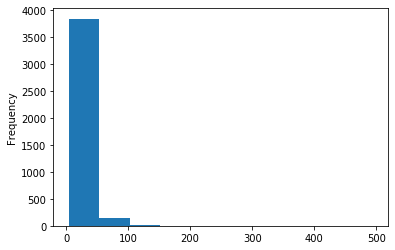

In [43]:
d.price.plot.hist()

In [44]:
d.describe()

,points,price
count,4012.000000,4012.000000
mean,85.611167,23.095464
std,3.000267,19.580240
min,80.000000,4.000000
25%,84.000000,13.000000
50%,85.000000,18.500000
75%,88.000000,26.250000
max,96.000000,495.000000


In the question they mentioned that customer can be different types and interested in different price range. Wines in the list has broad price range starting from 4 to 495. 

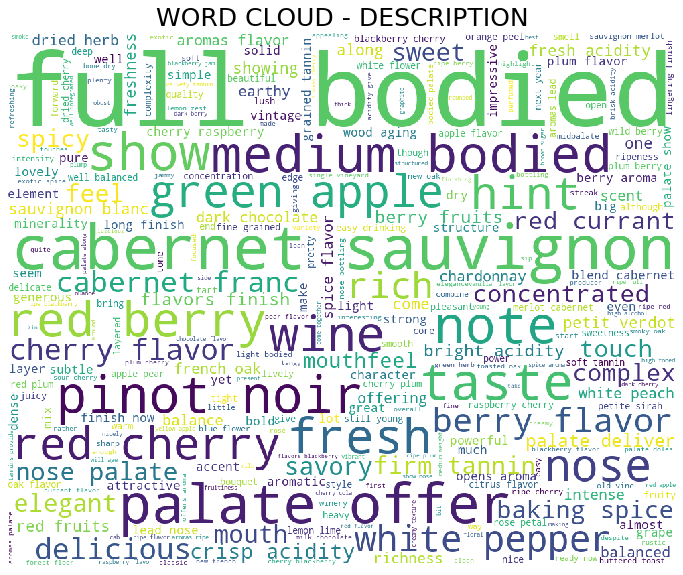

In [67]:
stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

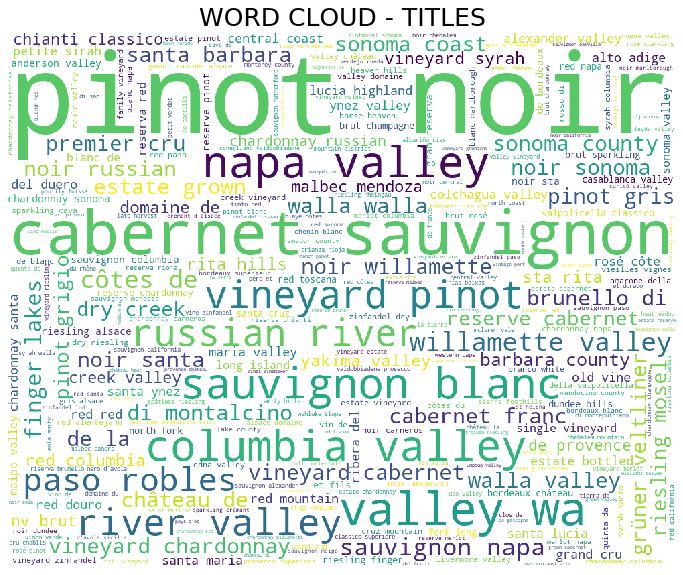

In [69]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

In [71]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [72]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']

wine1 = df[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [73]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [74]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recmmendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recmmendation for ## aligoté ##:
1: semillon-chardonnay with distance: 0.18038917850258862
2: counoise with distance: 0.18039091068256163
3: souzao with distance: 0.18049167286873935
4: sagrantino with distance: 0.18058442045172063
5: viognier-roussanne with distance: 0.1808297736447908


Recmmendation for ## sauvignon blanc-chenin blanc ##:
1: fumé blanc with distance: 0.42217097225640654
2: johannisberg riesling with distance: 0.5878525297334786
3: muscatel with distance: 0.5972195176940813
4: g-s-m with distance: 0.6178116194428439
5: bordeaux-style white blend with distance: 0.7438498084381984


Recmmendation for ## kalecik karasi ##:
1: boğazkere with distance: 0.00014362835091530357
2: okuzgozu with distance: 0.24448925284174994
3: narince with distance: 0.29522293846737113
4: çalkarası with distance: 0.49582150971527217
5: karalahna with distance: 0.501486436572404


Recmmendation for ## pallagrello bianco ##:
1: sirica with distance: 0.0
2: susumaniello with distance: 0.0
3: ca